In [1]:
#@markdown instalacion paqutes
package = ['boto3','es_lemmatizer','pyodbc','prince',
           'pyLDAvis==2.1.2','gensim']
f= open("paquetes.txt","w+")

def install_txt(package):
  f= open("paquetes.txt","w+")
  for i in package:
    print(i)
    

    try:
        __import__(i)
        print('ya instalado {}'.format(i))
    except ImportError:
        # main(['install', package]) 
        f.write("{} \r\n".format(i))
        print('No instalado {}'.format(i))


install_txt(package)
!pip install -r paquetes.txt  

boto3
No instalado boto3
es_lemmatizer
No instalado es_lemmatizer
pyodbc
No instalado pyodbc
prince
No instalado prince
pyLDAvis==2.1.2
No instalado pyLDAvis==2.1.2
gensim
ya instalado gensim
     |████████████████████████████████| 133kB 4.0MB/s 
     |████████████████████████████████| 3.2MB 19.4MB/s 
     |████████████████████████████████| 286kB 34.0MB/s 
     |████████████████████████████████| 1.6MB 37.6MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 7.7MB 41.5MB/s 
     |████████████████████████████████| 143kB 49.2MB/s 
  Created wheel for pyodbc: filename=pyodbc-4.0.31-cp37-cp37m-linux_x86_64.whl size=286775 sha256=9275ff7d33c356485735f3482c321733bdee56fb63e80068d078f4393f33ec50
  Stored in directory: /root/.cache/pip/wheels/0f/bb/99/22183f16f9e567064147a31b895c45f1ac0b1362e90e6ece01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=91863674518cf6fa9e1dbb92966d6b49edc388018e933fdb669d700c

#**Librerias**

In [2]:
#Librerias
import re
import numpy as np
import pandas as pd
import pandas_profiling
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import unicodedata
from es_lemmatizer import lemmatize
import spacy
import re
import pyodbc
import prince
import os
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import re #expresiones regulares
import itertools
from collections import Counter 
import seaborn as sns
import matplotlib as mpl
plt.style.use('ggplot')
sns.set_context("talk")
import datetime
import dateutil

#Librerias de visualizacion dinámica
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud
from pprint import pprint #Manipulacion de datos

#LDA MODEL FOR OBSERVACIONES
#quitar mas profundamente stop_words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import unicodedata
import tqdm
import spacy.cli
from spacy.lang.es.stop_words import STOP_WORDS 
#descargamos los modelos
from nltk.corpus import stopwords
nltk.download('stopwords')

nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
spacy.cli.download("es_core_news_md")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.lo

In [3]:
#@title Librerías modelo de LDA
## APLLY LDA MODEL TO OBSERVACIONES
#Gensim para modelado de temas, indexación de documentos y recuperación de similitudes con grandes corpus
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#Spacy para la lemmatization
import spacy
# Herramientas de graficado
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
# Habilitado de logging para gensim (opcional)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [4]:
#@title Librerías  modelo de Word2Vec
#word2vec modelo de EMBEDDING
#word2vec
from gensim.models import word2vec
import multiprocessing
from gensim.models import Word2Vec
from collections import defaultdict 
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from pylab import rcParams
from google.colab import widgets

#**Rutas**

In [5]:
#Rutas en Drive colab
os.getcwd()

'/content'

In [6]:

Campaña_P  = "/content/Modelo Analítico PCP - Beneficio Educativo.xlsx"
nombres = "/content/drive/MyDrive/Ecopetro/Estefania/nombres_apellidos.txt"

In [7]:
# os.chdir('/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Causación de facturas _Cockpit.')
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Consultas_retenciones_aplicadas
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Endoso_de_facturas
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Información_y_Seguimiento_a_usuarios_en_página_WEB_Proveedores
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Pagos_bloqueados
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Radicación_de_facturas
# /content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Retención_en_Garantía
os.chdir('/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Información_y_Seguimiento_a_usuarios_en_página_WEB_Proveedores')
os.getcwd()

'/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Información_y_Seguimiento_a_usuarios_en_página_WEB_Proveedores'

#**Funciones**

In [8]:
# CONEXION A SERVIDOR ###################################################################################
# def Conexion():
#     server = '172.27.48.148'
#     #database = 'bdcmp_NuevaEpsCrm' 
#     username = 'CienciaDatos' 
#     password = 'C13nc1aD47*5'  
#     cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';UID='+username+';PWD='+ password)
#     cursor = cnxn.cursor()
#     return cnxn


# DEFINICION DE PICOS Y FECHAS ##################################################################################
##Se definen fechas para realizar los respectivos filtros 
##cuando se extraiga la información correspondiente desde el servidor

def fechas(df_Tipo_OF):
    df_OF = df_Tipo_OF.astype(str).replace('NaT','20200101')
#######Operaciones financieras
    df_OF ['fecha_ini_1'] = df_OF['Picos de demanda  1'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_1'] = ['20210401','20210301','20210301','20210301', '20210301', '20210301', '20210401']
    df_OF ['fecha_ini_2'] = df_OF['Picos de demanda  2'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_2'] = ['20210501', '20210501', '20200101', '20210501', '20200101', '20210501', '20201001']
    df_OF ['fecha_ini_3'] = df_OF['Picos de demanda  3'].replace(regex=r'-', value = '').replace('0','20200101')
    df_OF ['fecha_fin_3'] = ['20210601', '20200101', '20200101', '20210601', '20200101', '20200101', '20210101']
    
    return df_OF  

## EXTRACCIÓN ########################################################################################################

def Extraccion(df_fechas, df_General, picos):
    #df_fechas : Nombre de la tabla con las tipologias seleccionadas y las fechas definidas correspondientes (con la función de fechas)
    #df_general : Nombre de tabla para cada campaña sin las fechas definidas 
    #picos : Número máximo de picos que se analizan [en OF son 2, en P son 3]
    
    query_base = "SELECT * FROM [172.27.90.50].[Ecopetrol_Reporting].[dbo].[Tbl_Ecopetrol_ResultadoBackOffice] "
    
    i = 0 
    cnxn = Conexion()
    query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas['fecha_ini_1'][i]+ "' AND '" + df_fechas['fecha_fin_1'][i] +"')"  
    query_completa = query_base + query
    df_inicial = pd.read_sql(query_completa, cnxn)

    for j in range(1,picos+1):
        df_General["Datos_Pico_"+str(j)] = 0
        for i in range(0,len(df_fechas['Campaña'])):
            cnxn = Conexion()
            query = "WHERE ([fgs_Nivel3] = '"+ df_fechas['Nivel 3'][i] + "') AND ([fgs_FechaInicio] BETWEEN '" + df_fechas["fecha_ini_"+str(j)][i]+ "' AND '" + df_fechas["fecha_fin_"+str(j)][i] +"')"  
            query_completa = query_base + query
            df = pd.read_sql(query_completa, cnxn)
            df_total = pd.concat([df_inicial,df]).drop_duplicates()
            df_inicial = df_total
            df_General["Datos_Pico_"+str(j)][i] = df.shape[0] 
    print('Total de registros:', df_inicial.shape[0])
    print('Total de columnas:', df_inicial.shape[1])
            
    return df_total,df_General                 

# VALORES FALTANTES ###############################################################################################################################################################################################

def Valores_Faltantes(df, porcentaje):
    Faltantes = df.isnull().sum()
    df_Faltantes = pd.DataFrame({'Nombre_Columnas':Faltantes.index, 'Total_Vacios':Faltantes.values})#[df_Faltantes['Total_Vacios'] != 0]
    df_Faltantes = df_Faltantes[df_Faltantes['Total_Vacios'] != 0]

    df_Faltantes['Porcentaje_vacio'] = ((df_Faltantes['Total_Vacios']/df.shape[0])*100).round(2)
    df_Faltantes['Columna_vacia'] = 'NO'
    df_Faltantes.loc[df_Faltantes['Total_Vacios'] == df.shape[0], 'Columna_vacia'] = 'SI'
    
    print('Total columnas con valores faltantes :', df_Faltantes.shape[0])
    print('Total columnas vacias :', df_Faltantes[df_Faltantes['Columna_vacia'] == 'SI'].Columna_vacia.count())
    print('Total columnas no vacias con mas del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    #print('Total columnas no vacias con menos del ' + str(porcentaje) + '% de valores faltantes :', df_Faltantes[(df_Faltantes['Porcentaje_vacio'] >= porcentaje) & (df_Faltantes['Columna_vacia'] == 'NO') ].Columna_vacia.count())
    
    return df_Faltantes

# ELIMINAR COLUMNAS##############################################################################################

#para eliminar columnas seleccionadas
def Eliminar_columnas(df, lista_columnas):
    df_drop = df.drop(columns = lista_columnas)
    print ('Cantidad de columnas iniciales : ', df.shape[1])
    print ('Cantidad despues de eliminar : ', df_drop.shape[1] )
    return df_drop
### elimincacion 100 valores nulos, cardinalida100, cardinalidad 1
def eliminacion_columnas(tabla):
  cardinalidad100 = tabla[tabla['% de valores diferentes']==100]
  cardinalidad1 = tabla[tabla['# de valores diferentes']==1]
  vacios = tabla[tabla['% de datos nulos']==100]
  variables_eliminar=vacios.index.tolist()+cardinalidad1.index.tolist()+cardinalidad100.index.tolist()# no aportan informacion
  print('numero de variables a eliminar : {}'.format(len(variables_eliminar)))
  return variables_eliminar
# columnas duplicadas
def columnas_dup(df):
    df_dup = df.T.duplicated().T
    return df_dup
#Para eliminar columnas duplicadas
def columnas_nodup(df):
    print ('Total de columnas antes de eliminar dup: ', df.shape[1])
    df_sindup = df.T.drop_duplicates().T
    print ('Total de columnas duplicadas : ', df.shape[1] - df_sindup.shape[1])
    print ('Total de columnas no duplicadas:', df_sindup.shape[1])
    return df_sindup    

def mytable(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    valpor = pd.DataFrame(data.nunique()/data.shape[0]*100,columns=['% de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val, valpor], axis=1)
    return mis_val_table

def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x


def nonum(x):
 try:
   int(x)
   sal = False
 except:
    sal = True
 return sal 


def isnum(x):
 try:
   int(x)
   sal = True
 except:
    sal = False
 return sal 

def solo_num(x):
  try:
    sal = float(x)
  except:
    sal = np.nan
  return sal 
def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x





#esta funcion quita stop words de cada una de las filas
def text_rows(texto, StopWords):
    texto = texto.split()
    resultwords  = [word for word in texto if word not in StopWords]
    texto = ' '.join(resultwords)
    return texto


def text (column, dic):
    column = column.astype(str)
    texto_base = " ".join(motivo for motivo in column)
    text = (unicodedata.normalize('NFKD', texto_base).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    text = re.sub(r"\bmedicas\b","medica",text)
    for i, j in dic.items():
        text = text.replace(i, j)
        
    return text
    
def listas (column, dic):
    Lista = []
    column = columna.astype(str)
    for motivo in column:
        inicial_answer = str(motivo)
        for i, j in dic.items():
            ini_answer = inicial_answer.replace(i, j)
        answer = (unicodedata.normalize('NFKD', ini_answer).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
        answer = re.sub(r"\bmedicas\b","medica",answer)
        answer = re.sub(r"\bmedicamentos\b","medicamento",answer)
        answer = re.sub(r'[^\w\s]','', answer).split()
        words = [word for word in answer if word not in stop_words]
        Lista.append(words)
    return Lista
    
#crea nube de palabras
def wordcloud(text, nombre, stopWords):
    # wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800,min_word_length =3 ).generate(text)
    wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800).generate(text)
    plt.figure( figsize=(15,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig("word_cloud_"+str(nombre)+".png") #dpi = 300)    

#crea n-gramas   
def ngrams(text, n, top,stopWords):
    #wnl = nltk.stem.WordNetLemmatizer()
    texto = re.sub(r'[^\w\s]','', text).split()
    stopwords = stop_words + stopWords
    words = [word for word in texto if word not in stopwords]
    
    n_grams_series = ((pd.Series(nltk.ngrams(words,n)).value_counts())[:top])
    plot = n_grams_series.sort_values().plot.barh(color ="tomato", width = 0.6, figsize = (20,18), edgecolor='grey')   #color=(0.2, 0.4, 0.6, 0.6)
    plot.set_xlabel('Frecuencia',  fontname="Calibri", fontsize=35)
    plot.set_title('TOP ' + str(top) +' de '+str(n)+'-GRAMAS QUE APARECEN CON MAYOR FRECUENCIA', fontname="Calibri", fontsize=40)
    plot.title.set_position([.5, 1.05])
    for tick in  plot.get_xticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    for tick in  plot.get_yticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    #plt.savefig("graph.png") #dpi = 300)
    plt.figure( figsize=(15,10) )
    #plt.show()
    return n_grams_series
    #if n == 1 :
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'palabras', 0:'Conteo'})
    #elif n == 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'Bigramas', 0:'Conteo'})
    #elif n > 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'gramas', 0:'Conteo'})

def wordcloud_jose(x):
  lista_mensajeuser=[]
  
  long_string=''.join(x)
  sal = pd.Series(long_string.split(' ')).value_counts()
  saldic = sal.to_dict()
  #Creacion lista stop words
  wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=600, contour_width=50,
                        contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  
  wordcloud2 = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=20, contour_width=50,
                      contour_color='steelblue', margin=15, stopwords=StopWords_total,width=1600, height=800)
  #Crear el word cloud
  #wordcloud.generate(long_string)
  wordcloud.generate_from_frequencies(saldic)
  wordcloud2.generate_from_frequencies(saldic)
  # wordcloud.generate(saldic)
  #Visualizar el word cloud
  plt.figure( figsize=(15,10) )
  
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  
  plt.figure( figsize=(15,10) )
  plt.imshow(wordcloud2, interpolation='bilinear')
  plt.axis("off")
  plt.show()


def plot_10_most_common_words(count_data, count_vectorizer):
   #Grafico de frecuencias
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    fig = px.bar( x=words, y=counts, color_discrete_sequence=["#25427B","#33BBFF","#EBECED"], title='TÉRMINOS MÁS COMUNES EN:'+' '+segmento,  labels=dict(x="Palabra Clave", y="Frecuencia", color="Place")) #COLORES DE ECOPETROL, PUEDES VARIAR LOS COLORES
    fig.write_html(segmento+"_.html")
    fig.show()
    return words,counts



def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def adjustment_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text


# **EXTRACCIÓN**

In [9]:
# observador_personal  = '/content/drive/MyDrive/Ecopetro/Estefania/Observaciones_LimpiezaInicial_Personal.csv'
observador_operacion_fin  ='/content/drive/MyDrive/Ecopetro/ECOPETROL_PCF/Observaciones_LimpiezaInicial_OpeFinanciera.csv'

In [10]:
OF = pd.read_csv(observador_operacion_fin )
OF.head()

,fgs_IdGestion,fgs_Nivel3,ObservacionCreacion_limpieza1,ObservacionSolucion_limpieza1,ObservacionEscalamientoN2_limpieza1,# palabras_ObsCreacion_sinLim,# palabras_ObsSolucion_sinLim,# palabras_ObsEscalamientoN2_sinLim,# palabras_ObsCreacion_limpieza1,# palabras_ObsSolucion_limpieza1,# palabras_ObsEscalamiento_limpieza1
0,14051976,Causación de facturas / Cockpit,con la presente solicito su colaboracion confi...,se informa que para poder dar respuesta a su r...,vacio,34,39,1,35,44,1
1,14052000,Causación de facturas / Cockpit,buenos dias el pasado d e enero la empresa cgg...,se solicita filtro de seguridad,vacio,59,5,1,56,5,1
2,14052016,Causación de facturas / Cockpit,gestion atendiendo su solicitud le informamos ...,vacio,gestion atendiendo su solicitud le informamos ...,76,1,76,77,1,77
3,14052090,Causación de facturas / Cockpit,consulta de facturas,se envia notificacion via correo electronico,vacio,3,6,1,3,6,1
4,14052123,Causación de facturas / Cockpit,consulta de facturas,se envia notificacion via correo electronico,vacio,3,6,1,3,6,1


In [11]:
mytable(OF[['fgs_IdGestion', 'fgs_Nivel3', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']])

,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes,% de valores diferentes
fgs_IdGestion,0.0,0.0,int64,11224,100.000000
fgs_Nivel3,0.0,0.0,object,7,0.062366
ObservacionCreacion_limpieza1,0.0,0.0,object,7624,67.925873
ObservacionSolucion_limpieza1,0.0,0.0,object,7645,68.112972
ObservacionEscalamientoN2_limpieza1,0.0,0.0,object,817,7.279045


## **GRUPOS**

In [12]:

OF['GRUPOS'] = OF['fgs_Nivel3']


In [13]:
interes = OF[[ 'fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1']].copy()

interes['ObservacionCreacion']=OF['ObservacionCreacion_limpieza1']#+" "+OF['fgs_Nivel3']
## no usar la tipologia

# interes['ObservacionSolucion_+_n2'] = OF['ObservacionSolucion_limpieza1']+' '+OF['ObservacionEscalamientoN2_limpieza1'].map(lambda x : x.replace('vacio',''))# aqui el problema
interes['ObservacionSolucion_+_n2'] = OF['ObservacionSolucion_limpieza1']+' '+OF['ObservacionEscalamientoN2_limpieza1']#.map(lambda x : re.sub(r'vacio', '', x))
# interes['ObservacionSolucion_+_n2'] = OF['ObservacionSolucion_limpieza1']+' '+OF['ObservacionEscalamientoN2_limpieza1'].str.replace('vacio', '',regex = True)


In [14]:
# texto = 'obserne'
# mapa = interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
# pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2').head(2)

In [15]:
interes[interes['fgs_IdGestion'] ==13910437][['ObservacionEscalamientoN2_limpieza1']].set_index('ObservacionEscalamientoN2_limpieza1')

""
ObservacionEscalamientoN2_limpieza1


In [16]:
texto_total = interes['ObservacionCreacion_limpieza1'].astype(str).sum()
len(texto_total.split(' '))

265164

In [17]:
texto_total = interes['ObservacionSolucion_+_n2'].astype(str).sum()
len(texto_total.split(' '))

370007

In [18]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionEscalamientoN2_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2'],
      dtype='object')

In [19]:
interes = interes[['fgs_IdGestion','GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1',
       'ObservacionCreacion', 'ObservacionSolucion_+_n2',
       'ObservacionEscalamientoN2_limpieza1']].copy()

In [20]:

# for i in interes.columns:
#   display(interes[i].value_counts())
#   print('_'*100)

In [21]:

for i in interes.columns:
  display(pd.DataFrame(interes[i].value_counts()))
  print('_'*100)

  # si hay cambios

,fgs_IdGestion
14353450,1
14279998,1
14103884,1
13948232,1
14101831,1
...,...
13925042,1
14052016,1
14097070,1
14186903,1


____________________________________________________________________________________________________


,GRUPOS
Causación de facturas / Cockpit,7939
Radicación de facturas,1457
Información y Seguimiento a usuarios en página WEB Proveedores,1361
Endoso de facturas,181
Retención en Garantía,133
Consultas retenciones aplicadas,102
Pagos bloqueados,51


____________________________________________________________________________________________________


,ObservacionCreacion_limpieza1
consulta de facturas,1036
solicita informacion de estado de factura,486
solicita acceso al portal proveedores,83
solicita informacion de las facturas,82
solicita desbloqueo de usuario portal proveedores,80
...,...
el presente correo es para solicitar informacion sobre el pago que esta pendiente de las siguientes facturas si este ya fue realizado agradecemos por favor enviar soporte de pago,1
amablemente informo que luego de ingresar el numero de cuenta bancaria y darle enviar la pagina no carga se queda en blanco agradezco su ayuda para poder registrarnos,1
fecha nombre cindy cedula cargo asistente nit solicitud informacion de actualizacion de datos caso informacion factura,1
fiducia consulta factura,1


____________________________________________________________________________________________________


,ObservacionSolucion_limpieza1
vacio,508
se envia notificacion via correo electronico,426
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible,268
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible,152
se genera correo de respuesta al proveedor solicitando filtro de seguridad,89
...,...
persona que consulta maria estella lizcanocargo aux contablecedula nit en relacion a la llamada se informa lo siguiente fe radicada el en proceso de causacion con el siguiente mensaje informo que no es posible contabilizar la factura se evidencia diferencias en el impuesto se remite con el adminiva solicito de su ayuda fe radicada el radicada el ez en proceso de causacion con el siguiente mensaje informo que no es posible contabilizar la factura por que se evidencia diferencia en elimpuesto iva se remite con el admin,1
se informa que la factura no e registra en sistema rechazada y con la siguiente nota estamos devolviendo los documentos que relacionamos a continuacion por presentar las inconsistencias senaladas no documento fecha recepcion importe motivo devolucion esperamos mas de dias para el ingreso del material y hastala fecha no tiene ingreso en el sistema descripcion solicitamos efectuar las correcciones del caso y elaborar un nuevo documento con fecha del mes en que lo radique de acuerdo a lo anterior agradecemos validar con el administrador del contrato,1
se confirma causacion de la factura fevp con fecha de pago para el doc pendiente de contabilizar fevp dado que en el mensaje no se evidencia claramente cual es la razon por la cual no se puede contabilizar lafactura se hizo la revision de la situacion y se concluye lo siguiente esta factura corresponde al pago de la ods este pago se notifico con la hes por valor de el contratista presento la factura fevp por el mismo valor sin iva se solicita validar con el administrador del contrato y la factura fevp se escala caso a leonardo pineda para asignar responsable para causacion pendiente a la fecha radicada el a,1
en relacion a la llamada se informa la factura fe fe fe fecha posible de pago para el dia,1


____________________________________________________________________________________________________


,ObservacionCreacion
consulta de facturas,1036
solicita informacion de estado de factura,486
solicita acceso al portal proveedores,83
solicita informacion de las facturas,82
solicita desbloqueo de usuario portal proveedores,80
...,...
el presente correo es para solicitar informacion sobre el pago que esta pendiente de las siguientes facturas si este ya fue realizado agradecemos por favor enviar soporte de pago,1
amablemente informo que luego de ingresar el numero de cuenta bancaria y darle enviar la pagina no carga se queda en blanco agradezco su ayuda para poder registrarnos,1
fecha nombre cindy cedula cargo asistente nit solicitud informacion de actualizacion de datos caso informacion factura,1
fiducia consulta factura,1


____________________________________________________________________________________________________


,ObservacionSolucion_+_n2
se envia notificacion via correo electronico vacio,426
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,268
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,152
se genera correo de respuesta al proveedor solicitando filtro de seguridad vacio,89
en respuesta a su solicitud le informamos el estado de las facturas solicitadas vacio,85
...,...
facturas fl fl fl fl en proceso de causacion les recordaremos que la politica de pago de ecopetrol es a dias calendario despues de radicada por lo tanto lo invitaremos a consultar en el portal de proveedores con el fin de que identifique si la factura ya esta causada vacio,1
en respuesta a su solicitud le informamos que los siguientes datos telefono fijo no coincide con el registrado en el sistema datos de la persona que consulta cedula vacio,1
atendiendo su solicitud le informamos que las facturas no no se visualizan en sistema por favor emitir los siguientes soportes el correo que enviaron directamente desde su proveedor tecnologico el archivo xml y representacion grafica para las validaciones correspondientes vacio,1
estimado a wilson lopez segura en atencion a su solicitud nos permitimos informar que la factura ybfl se encuentra contabilizada y con posible pago vacio,1


____________________________________________________________________________________________________


,ObservacionEscalamientoN2_limpieza1
vacio,10381
sin observaciones,4
buen dia se escala para su amable gestion se adjunta soportes de acuerdo con lo indicado remito certificado de cuenta fiduciaria y pantallazo del sistema donde se evidencia la cuenta creada para su compensacion cuenta bancaria de la fiduciabuen dia se escala para su amable gestion caso escalado a segundo nivelsociedad mdtoacreedor nombre de la empresa applus norcontrol colombia limitadanumero de rg rg coldoc interno nit de la fiducia o acreedor nombre de la fiducia bancolombiacuenta de la fiducia no tipo de cuenta cuenta corrienteobservacion del caso al validar en sap la rg factura presenta bloque c el proveedor confirma la informacion de la fiducia para que la rg sea consignada se escala a segundo nivel nombre de proveedor applus norcontrol colombia limitadaacreedor numero de facturas rg colsociedad mdtonumero documento interno detalle del caso remito certificado de cuenta fiduciariaautor de la factura e,3
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible acreedor sociedad asocnombre sociedad colombiana de serviciossolicitud muy buenos dias quisiera solicitar aclaracion de las retenciones a las facturas cfe ya que el porcentaje de retenciones que se debe aplicar es el transporte nacional maritimo de carga y no del como al parecer fue aplicado esto debido a que se considera servicio de remolque a la operacion por la que un buque remolcador transporta mediante su arrastre por el mar a otro buque o aparato flotante que carece de autopropulsion o que poseyendola no esta en condiciones de navegar por sus propios medios para el caso del servicio prestado por serviport en las instalaciones del puerto de covenas el servicio esta denominado remolque maniobra cuyo objeto es facilitar a los buques la entrada y salida de puerto rada o ensenada en donde por no poder maniobrar con suficiente seguridad se solicita la ayuda de los remolcadores teniendo en cuenta lo anterior consideramos que el servicio de remolcador es un servicio de trasporte maritimo y por tanto segun lo senala el decreto de senala en su articulo articulo retencion en la fuente por concepto de servicios de transporte nacional o internacional los pagos o abonos en cuenta que efectuen las personas juridicas y sociedades de hecho por concepto de los servicios de transporte nacional prestados por las empresas colombianas de transporte aereo o maritimo se someteran a una retencion en la fuente del uno por ciento teniendo en cuenta lo anterior solicitamos la correccion y el reembolso del exceso de las retenciones aplicadas,3
buen dia se escala para su amable gestion se adjunta soportes por medio de la presente me permitio solicitar el estado que se encuentra las siguientes facturas ya que lamentablemente en el portal de ecopetrol no se encuentra publicadas y adicional estas facturas ya cumplieron los dias de radicado y aun no ha dado el efecto del pago por lo cual nos abocamos a la ley del de julio de de pagos justos y ademas a la clausula sexta del contrato el cual establece la cancelacion de las obligaciones dias despues de radicada la factura agradecemos dar respuesta a nuestra solicitud ya que el pasado de febrero se habia remitido este mismo correo se escala a segundo nivel nombre de proveedor union temporal ecoseg acreedor numero de facturas feutsociedad ecopetrolnumero documento interno n adetalle del caso factura aun sin causarautor de la factura e,3
...,...
gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones se escala beneficio de pronto pago lenis carvajal adriana patriciafepersona de contacto adriana lemes cedula cargo representantenit,1
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible solicito de su amable colaboracion con el 

____________________________________________________________________________________________________


In [22]:
original =interes.copy()

## Limpieza nivel general

In [23]:
# crecion columna = creacion + nivel 3


## Pipe line de limpieza

In [24]:
pd.DataFrame(interes['ObservacionCreacion'].value_counts()).head(10)

,ObservacionCreacion
consulta de facturas,1036
solicita informacion de estado de factura,486
solicita acceso al portal proveedores,83
solicita informacion de las facturas,82
solicita desbloqueo de usuario portal proveedores,80
desbloqueo web portal,76
consulta factura,71
el portal esta con bloqueo,66
solicita el desbloqueo del usuario de acceso al portal de consulta de pagos,53
estado de factura,49


In [25]:
# trabajadores, pensionados , sustitutos.(incuyecon )
#Pensionados (Incluye Sustitutos) solicita informacion dejar.

In [26]:
pd.DataFrame(interes['ObservacionSolucion_+_n2'].value_counts()).head(10)

,ObservacionSolucion_+_n2
se envia notificacion via correo electronico vacio,426
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,268
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,152
se genera correo de respuesta al proveedor solicitando filtro de seguridad vacio,89
en respuesta a su solicitud le informamos el estado de las facturas solicitadas vacio,85
le informamos que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc nombre del representante legal direccion ciudad telefono correo electronico vacio,81
le informamos que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc con digito de verificacion nombre del representante legal direccion ciudad telefono correo electronico datos de la persona que consulta nombre completo no de cedula cargo vacio,80
se informa que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc nombre del representante legal direccion ciudad telefono correo electronico datos de la persona que consulta nombre completo no de cedula cargo vacio,77
se solicita filtro de seguridad vacio,68
para poder dar respuesta a su solicitud le agradecemos enviarnos la siguiente informacion nombre completo de la empresa nit con digito de verificacion nombre del representante legal direccion ciudad telefono correo electronico vacio,67


In [27]:
original.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [28]:
# interes, original = eliminacion_stopwords()
#Eliminamos los espacios al inicio y al final de cada strig

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('(','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('(','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace(')','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace(')','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('/','') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('/','') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )

interes['ObservacionSolucion_+_n2']=interes['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
interes['ObservacionCreacion']=interes['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)




In [29]:
print(
sum(interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x : len(x.split(' ')))),
sum(interes['ObservacionCreacion'].astype(str).map(lambda x : len(x.split(' ')))),
)

372306 267219


In [30]:
stop_words=[]
guiones =[]

guiones+=['gestion su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'se envia respuesta adjunta por correo oficina virtual desde servicios compartidos queremos solucionar todos tus requerimientos de acuerdo con su solicitud de',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico falta como se le indica debe adjuntar la certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo la certificacion que presenta faltan dados solicitados uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco escanearlo mejor b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular en caso de beca postgrado hijos para personal beneficiario de la convencion adjuntar copia del diploma o acta de grado para bachilleres ecopetrol anexar certificado de promedio certificado de la carrera nota en caso de presentar alguna restriccion en el aplicativo se agradece enviar toda la documentacion requerida para este tramite en un solo archivo pdf peso maximo mb junto con el print del error presentado donde agrupe la totalidad de los soportes exigidos por favor no enviar archivos separados al correo electronico de oficina virtual de personal con el fin de brindarle toda la asistencia necesaria a su requerimiento oficinavirtualdepersonal ecopetrol com co vacio',
          
          'gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible solicito de su amable colaboracion con el casoacreedor nombre',
          'gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible',
          'le informamos que para proceder a tramitar la solicitud debe enviar nuevamente todos los documentos junto con el pantallazo del error requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'desde servicios compartidos mantenemos una comunicacion y oportuna con nuestros clientes por eso a continuacion encontrara toda informacion relacionada con',
          'ingresa a autoservicioingrese usuario y contrasena redseleccione pestana beneficio modulo beneficio educativoseleccione su beneficiario dando clic opcion crear solicitud y continue proceso caso que presente inconvenientes con ingreso a autoservicio tomar captura pantalla error y enviar al buzon habilitado oficinavirtualdepersonal com co con documentos pertinentes por este medio un solo archivo formulario diligenciado y firmado por titular y por caso que no diligencie formulario debera presentar certificacion avance que conste informacion formulario semestre a cursar periodo lectivo valor por matricula ordinaria programa academico uno siguientes documentos a original recibo pago que especifique valor ordinario matricula con respectivos sellos banco caso pagos electronicos debe presentar soporte transferencia donde se observe que transaccion fue exitosa o aceptada anexando documento que detalle valor ordinario matriculac certificacion emitida por donde indique valor matricula ordinaria cancelada solicitudes primer semestre cambio o certificado admision o carta aceptacion por parte debe anexar programa academico pensum malla curricular',
          'dando alcance al correo precedente nos permitimos informarle que',
          'new party has joined the session',
          'sala chat breve sera atendido'
          'su interaccion quedo registrada bajo el numero lo invito a calificar nuestro servicio en la siguiente encuesta '
          'atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible con las siguientes'
          'solicitud del usuario informacion de la llamada solicitud solicita',
          ]

guiones+=['nos permitimos informarle que en atencion a su' 
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'puede realizarlo ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione el beneficiario dando clic en la opcion crear solicitud y continue el procesoen caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar por el buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes en un solo archivo pdf formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular todos los documentos deben ser adjuntados en un solo archivo pdf con peso no mayor a mb vacio',
          'ingresa a autoservicioingrese usuario y contrasena de redseleccione la pestana beneficio educativo modulo beneficio educativoseleccione su beneficiario dando clic en la opcion crear solicitud y continue el proceso en caso que presente inconvenientes con el ingreso a autoservicio tomar captura de pantalla del error y enviar al buzon habilitado oficinavirtualdepersonal ecopetrol com co con los documentos pertinentes por este medio en un solo archivo formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matriculac certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad certificado de admision o carta de aceptacion por parte de la institucion educativa debe anexar programa academico pensum malla curricular caida vpn perdida de la llamada vacio',
          'formulario diligenciado y firmado por el titular y por la institucion en caso que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico uno de los siguientes documentos a original de recibo de pago que especifique el valor ordinario de matricula de la institucion con los respectivos sellos de cancelado del banco b en caso de pagos electronicos debe presentar soporte de la transferencia donde se observe que la transaccion fue exitosa o aceptada anexando documento de la institucion educativa que detalle el valor ordinario de matricula c certificacion emitida por la institucion donde indique el valor de matricula ordinaria cancelada para solicitudes de primer semestre cambio de carrera o universidad debe anexar programa academico pensum malla curricular vacio',
          'cordial saludo en atencion a su comunicado nos permitimos',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes por eso a continuacion encontrara toda la informacion relacionada con la solicitud referente a',
          'desde servicios compartidos mantenemos una comunicacion clara y oportuna con nuestros clientes',
          'sus opiniones son importantes para nosotros con el fin de seguir apuntando nuestros esfuerzos a la mejora de los servicios ofrecidos',
          'queremos informarle que desde el contact center disponemos de varios canales de contacto para la atencion de solicitudes relacionadas con servicios al personal',
          'requisitos reconocimiento plan educacional estudios superiores formulario diligenciado y firmado por el titular y por la institucion en caso de que la institucion no diligencie el formulario debera presentar certificacion de avance en la que conste la informacion del formulario semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico',
          'certificacion con la informacion solicitada semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico ya que el formato no lo firma el plantel educativo falta la certificacion valor cancelado matricula',
          'canales telefonicos linea gratuita nacional linea directa bogota',
          'canal correo electronico oficinavirtualdepersonal ecopetrol com co',
          'dando alcance al correo precedente nos permitimos informarle que para',
          'se informa que',
          'su caso se escalo al area encargada para su tramite con las siguientes observaciones',
          'https gestiondepersonal ecopetrol com co',
          'link https gestiondepersonal com co',
          'buen dia','oficinavirtual com co','buen dia atencion',
          'siguientes observaciones',
          'siguientes observaciones',
          'caso escalo',
          'caso escalado',
          'com co',
          'desde servicios compartidos queremos solucionar todos tus requerimientos acuerdo',
          'valor ordinario',
          'buenas tardes',
          'buenos dias',
          'cordial saludo',
          'nos permitimos informarle',
          'oficina virtual',
          'he tratado',
          'quedo atento',
          'de manera atenta',
          'manera atenta',
          'por favor',
          'ha sido',
          'solicitud recibida registrada bajo numero',
          'solicitud recibida registrada bajo numero adjunto',
          'recibiras confirmacion estado tu tramite durante tiempo maximo dias contados partir fecha solicitud',
          'le recordamos que a la fecha presenta un', 
           'del periodo lectivo a por el beneficiario a',
          'usuario contrasena',
          'adjuntando documentacion unico archivo pdf formulario diligenciado firmado diligencie formulario debera certificacion avance conste informacion formulario semestre cursar periodo lectivo valor matricula ordinaria programa academico original recibo pago especifique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documento generado por la universidad en donde consta la informacion del semestre a cursar periodo lectivo valor cancelado por matricula ordinaria programa academico recibo de pago en donde se especifica el valor ordinario de matricula de la institucion el respectivo sello de cancelado del banco factura electronica de venta expedida por la universidad libre acta matricula con horario',
          'ustedes dicen',
          'periodo lectivo',
          'bajo numero adjunto segun diferente asegure',
          'bajo numero',
          'continuacion relacionamos requisitos cuales tambien puede validar respaldo formulario gth formulario diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula ordinaria programa academico original recibo pago espeficique matricula sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle matricula certificacion emitida valor matricula ordinaria cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular beca postgrado hijos beneficiario convencion adjuntar copia diploma acta grado bachilleres anexar certificado promedio certificado revisando documentacion enviada falta documento recibo pago especifique matriculauna vez tenga completos enviolos nuevamente todos archivo pdf oficinavirtualdepersonal mencionando inicial muchas hacer uso nuestros servicios invitamos continuar sus solicitudes medio portal servicios compartidos linea unica atencion desde servicios compartidos placer gestionar sus solicitudes agradecemos atencion prestada deseamos feliz dia anexan soportes',
          'has left the session',
          'recuerde hablo interaccion quedo registrada invito calificar nuestro servicio encuesta',
          'medio presente permito muy respetuosamente',
          'muy respetuosamente',
          'sellos banco pagos electronicos soporte transaccion exitosa aceptada documento detalle',
          'alguna falla error aplicativo usted podra envio toda documentacion requerida tramite archivo pdf peso maximo agrupe totalidad soportes exigidos',
          'numero cedula sin puntos ni espacios pensionados sustitutos bachilleres colombia embargantes contrasena recuerda deja da click recordar clave sistema envia automaticamente electronico registrado ante trabajadores directos mismo clave red',
          'diligenciado firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'diligencie formulario debera certificacion avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico pensum malla curricular',
          'documentacion requerida tramite archivo pdf peso maximo junto print error presentado agrupe totalidad soportes exigidos envio archivos separados electronico fin brindarle toda asistencia necesaria requerimiento',
          'avance informacion formulario semestre cursar valor matricula programa academico original recibo pago especifique matricula matricula certificacion emitida valor matricula cancelada solicitudes primer semestre cambio anexar programa academico',
          'certificacion avance informacion formulario semestre cursar valor matricula programa academico',
          'firmado diligencie formulario debera certificacion avance informacion formulario semestre cursar',
          'nos permitimos',
          'masivo padre',
          'nit o cedula o registro',
          'verifique sea solucionado mas pronto',
          'atendiendo solicitud informamos hemos enviado requerimiento posible',
          'atendiendo solicitud informamos hemos enviado requerimiento',
          'llamada solicitud',
          'mas pronto posible'
          

 ]


stop_words+=['no','de', 'la', 'el', 'que', 'a', 'en', 'se', 'y', 'por', 'para','donde', 'observe', 'debe', 'fue','un','al', 'le','es' ,'o','con',
             'su','lo','legal','consultas','ecp','via','consultas','vía','via','vacio','senora','mb','caso','gestion','este','comité','gracias',
             'me','mi','recibe','activos','ya','Legalización','legalización','legalizacion','senor','senora','cc',
             'septiembre','agosto','sobre','como','esta','sr','comunica','buzon','cual','debido','indique',
             'remitidos','respectivos','uno','titular','fimrado','anexando','siguiente','recepcion','transferencia','si',
             'documentos','siguientes','encargada','area','solo','un','presentar','correo',
             'referente','buzon','area encargada','area','encargada','plan','educacional','firma','nombre',
             'pero','favor','agradezco','agradesco','cordialmente','quiere','par','una','tengo','uno','solo',
             'cuarto','lunes','martes','jueves','viernes','sabado','domingo','estara','febrero','conste','funcionario',
             'personal','usuario','ano','porque','sra','quien','parte','hace','m','persn','ha','crea','respetuosamente','legalizar',
             'colaboracion','les','informarle','indicarle','vi','debo','y','fe','cedula','s','nit','cedula','agradecemos',
             'enero','febrero','marzo','abril', 'mayo','junio','julio','agosto','septiembre',
             'octubre','noviembre','diciembre','desde'
             ]


adjustment ={"enviar":"envio","deseo saber":"solicitud","desea saber":"solicitud","falta falta":"falta","requiere":"solicitud",
             "solicitar":"solicitud","solicita":"solicitud"," rec ":" recibo ",
              "informacion reconocimiento derechos grado":"solicitud reconocimiento derechos grado" ,
              "solicitud informacion reconocimiento derechos":"solicitud reconocimiento derechos grado","mijo":"hijo",
             "solicitud solicitud":"solicitud", "solicitud reconocimiento":"reconocimiento","hijo ":" hijo_a ","hija":"hijo_a ",
             "ingles nivel":"nivel ingles","facturas":"factura", "s a s":"s.a.s","ereferencia":"referencia", "feobservacion":"observacion",
             "solicitud informacion solicitud":"informacion solicitud",
             "efactura":"factura", "aobservaciones":"observaciones",
             "solicitud informacion solicitud validar factura":"informacion solicitud validar factura"

             }   


nombres_lista = pd.read_csv(nombres, sep=" ", header = None)
stop_words+= nombres_lista[0].to_list()+['ligia' ,'maria' ,'aguilera','murcia' ,'yudi' ,'cuadros' ,'torrado','valeria','Valeria','Nicole','nicole',
                                         'francisca','Francisca','isabella','berdugo','sharon','gabriela','danna','juanita']


# pd.DataFrame(guiones).set_index(0)


In [31]:

#Hay que correrlo dos veces :( ni idea por que
def limpieza_guiones(x, guiones_ = guiones):
  for i in guiones_: 
    x =x.replace(i,'')
  return x

def limpieza_stop(x, stop_words=stop_words):## para palabras individuales
  y = x.split(' ')
  z = [i for i in  y if i  not in stop_words] 
  return  ' '.join(z)





#'Información y Seguimiento a usuarios en página WEB Proveedores'

In [32]:
interes['GRUPOS'].unique()

array(['Causación de facturas / Cockpit', 'Endoso de facturas',
       'Pagos bloqueados', 'Radicación de facturas',
       'Consultas retenciones aplicadas', 'Retención en Garantía',
       'Información y Seguimiento a usuarios en página WEB Proveedores'],
      dtype=object)

In [33]:
mapa = interes['GRUPOS']=='Información y Seguimiento a usuarios en página WEB Proveedores'
grupo = interes[mapa].copy()
print(grupo.shape, interes.shape)

(1361, 7) (11224, 7)


In [34]:
pd.DataFrame(grupo['ObservacionCreacion'].value_counts()).head(10)

,ObservacionCreacion
solicita acceso al portal proveedores,84
solicita desbloqueo de usuario portal proveedores,78
el portal esta con bloqueo,64
desbloqueo web portal,64
solicita el desbloqueo del usuario de acceso al portal de consulta de pagos,52
se envia notificacion via correo electronico,16
consulta de facturas,8
solicita el desbloqueo del portal,6
solicita creacion del usuario de acceso al portal de consulta de pagos,6
solicita el desbloqueo del portal de proveedores,5


In [35]:
pd.DataFrame(grupo['ObservacionSolucion_+_n2'].value_counts()).head(10)

,ObservacionSolucion_+_n2
se envia notificacion via correo electronico vacio,52
le informamos que hemos desbloqueado su usuario debe ingresar y registrarse nuevamente asignando una clave diferente vacio,42
se genera correo de respuesta al proveedor solicitando filtro de seguridad vacio,31
atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible vacio,27
en respuesta a su solicitud le informamos que hemos desbloqueado su usuario debe ingresar y registrarse nuevamente asignando una clave diferente vacio,25
se genera correo de respuesta al proveedor con intrucciones de desbloqueo de portal de proveedores vacio,25
le informamos que para poder dar respuesta a su requerimiento le agradecemos enviarnos la siguiente informacion nombre de la empresa nit o cc con digito de verificacion nombre del representante legal direccion ciudad telefono correo electronico datos de la persona que consulta nombre completo no de cedula cargo vacio,24
se genera correo de respuesta al proveedor validando datos errados del filtro de seguridad vacio,19
se realiza la validacion de la siguiente informacion solicitud y gestion se procede al desbloqueo del portal de proveedores vacio,17
se procede al desbloqueo del portal vacio,17


In [36]:
texto = 'estado de factura fe'
mapa = grupo['ObservacionCreacion'].astype(str).map(lambda x: x.find(texto))!=-1
pd.DataFrame(grupo[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion').head(3)
#revisra en el original

,fgs_IdGestion
ObservacionCreacion,


In [37]:
mapa = interes['fgs_IdGestion']==13909967
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,


In [38]:
#@markdown limpieza guiones
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))
print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

30122 23913


In [39]:
#@markdown limpieza stop



grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))



print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


14145 12128


In [40]:
#@markdown limpieza sustitucion                                                                                                      
grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
                            lambda x: adjustment_all(x,  adjustment))
grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
                            lambda x: adjustment_all(x,  adjustment))

print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)


14144 12106


In [41]:
#@markdown limpieza



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].map(lambda x : x.lower())
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].map(lambda x : x.lower())



# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))

# grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_stop(x))
# grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_stop(x))

                                                                                                         
# grupo['ObservacionSolucion_+_n2']  = grupo['ObservacionSolucion_+_n2'] .map(
#                             lambda x: adjustment_all(x,  adjustment))
# grupo['ObservacionCreacion']  = grupo['ObservacionCreacion'] .map(
#                             lambda x: adjustment_all(x,  adjustment))



# print(
# sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
# sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
# )


In [42]:
grupo['ObservacionSolucion_+_n2'] = grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : limpieza_guiones(x))
grupo['ObservacionCreacion'] = grupo['ObservacionCreacion'].astype(str).map(lambda x : limpieza_guiones(x))


print(
sum(grupo['ObservacionSolucion_+_n2'].map(lambda x : len(x.split(' ')))),
sum(grupo['ObservacionCreacion'].map(lambda x : len(x.split(' ')))),
)

14008 12104


In [43]:

grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.strip() if type(x)==str else x)
grupo['ObservacionSolucion_+_n2']=grupo['ObservacionSolucion_+_n2'].astype(str).apply(lambda x: x.replace('  ',' ') )
grupo['ObservacionCreacion']=grupo['ObservacionCreacion'].astype(str).apply(lambda x: x.replace('  ',' ') )


In [44]:
freq_cre = pd.Series(grupo['ObservacionCreacion'].map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_cre

portal          798
solicitud       642
desbloqueo      522
proveedores     401
consulta        253
acceso          207
informacion     197
pagos           192
certificados    188
cargo           174
dtype: int64

In [45]:
freq_sol= pd.Series(grupo['ObservacionSolucion_+_n2'].astype(str).map(lambda x : x.split(' ')).sum()).value_counts().head(10)
freq_sol

portal         464
respuesta      402
desbloqueo     392
informacion    381
solicitud      349
informamos     331
electronico    295
proveedores    242
datos          238
filtro         210
dtype: int64

In [46]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [47]:
# interes['ObservacionCreacion_fgsnivel3'].astype(str).map(lambda x : limpieza_guiones(x))[mapa].values[0]

### Buscador

In [48]:
#BUSCADOR
# metodo para busqueda de plabras ( se puede generar el mapa con el original y revisar en el de interes.)
texto = 'solicitud informacion solicitud validar factura' 
mapa = interes['ObservacionSolucion_+_n2'].astype(str).map(lambda x: x.find(texto))!=-1
x = pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2')
x.head(3)#revisra en el original

,fgs_IdGestion
ObservacionSolucion_+_n2,


In [49]:
x.shape

(0, 1)

In [50]:
x.reset_index()[['ObservacionSolucion_+_n2']].value_counts()

Series([], dtype: int64)

In [51]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [52]:
mapa = interes['fgs_IdGestion']==13909967
pd.DataFrame(interes[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2')

,fgs_IdGestion
ObservacionSolucion_+_n2,


In [53]:
mapa = grupo['fgs_IdGestion']==13940701
pd.DataFrame(grupo[['ObservacionSolucion_+_n2','fgs_IdGestion'	]][mapa]).set_index('ObservacionSolucion_+_n2')

,fgs_IdGestion
ObservacionSolucion_+_n2,


In [54]:
# interes.columns

In [55]:
mapa = grupo['ObservacionCreacion'].astype(str).map(lambda x: x.find(texto))!=-1
pd.DataFrame(grupo[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion').head(3)

,fgs_IdGestion
ObservacionCreacion,


In [56]:
interes.columns

Index(['fgs_IdGestion', 'GRUPOS', 'ObservacionCreacion_limpieza1',
       'ObservacionSolucion_limpieza1', 'ObservacionCreacion',
       'ObservacionSolucion_+_n2', 'ObservacionEscalamientoN2_limpieza1'],
      dtype='object')

In [57]:
mapa = interes['fgs_IdGestion']==14059907
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,
solicitud del usuario informacion de la llamada solicitud solicita validar ncd c e de ecopetrol solucion persona que consulta juanita colorado cargo colector ciudad bogota cedula nit,14059907


In [58]:
mapa = interes['fgs_IdGestion']==14059685
pd.DataFrame(interes[['ObservacionCreacion','fgs_IdGestion'	]][mapa]).set_index('ObservacionCreacion')

,fgs_IdGestion
ObservacionCreacion,
gestion atendiendo su solicitud le informamos que hemos enviado requerimiento al area encargada para que se verifique este caso y sea solucionado lo mas pronto posible acreedor sociedad ecopetrolnombre consorcio ogs ca sucursal colombiaautor ereferencia fe y fe observacion agradecemos contabilizar factura esta proxima a vencer,14059685


### Creacion

In [59]:
name = 'Creacion'

In [60]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion#+ ' '+ df_solucion
df_in.iloc[0]

'realiza validacion informacion solicitud descargar certificados retencion registro portal persona consulta cargo aux contable'

In [61]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['portal', 'solicitud', 'desbloqueo', 'proveedores', 'consulta', 'acceso', 'informacion', 'pagos', 'certificados', 'cargo', 'solicito', 'clave', 'contrasena', 'retencion', 'ingresar']


['portal proveedores', 'solicitud desbloqueo', 'desbloqueo portal', 'acceso portal', 'consulta pagos', 'persona consulta', 'informacion solicitud', 'solicitud acceso', 'portal consulta', 'realiza validacion', 'validacion informacion', 'consulta cargo', 'web portal', 'certificados retencion', 'descargar certificados']


['solicitud desbloqueo portal', 'desbloqueo portal proveedores', 'acceso portal proveedores', 'solicitud acceso portal', 'portal consulta pagos', 'realiza validacion informacion', 'validacion informacion solicitud', 'persona consulta cargo', 'informacion solicitud desbloqueo', 'acceso portal consulta', 'portal proveedores persona', 'proveedores persona consulta', 'desbloqueo web portal', 'desbloqueo acceso portal', 'solicitud desbloqueo acceso']


['solicitud desbloqueo portal proveedores', 'solicitud acceso portal proveedores', 'realiza validacion informacion solicitud', 'informacion solicitud desbloqueo portal', 'acceso portal consulta pagos', 'portal proveedores persona consulta', 'desbloqueo portal proveedores persona', 'validacion informacion solicitud desbloqueo', 'desbloqueo acceso portal consulta', 'proveedores persona consulta cargo', 'solicitud desbloqueo acceso portal', 'fallas sonido inicio llamada', 'solucion persona consulta cargo', 'pagos factura pendientes pago', 'proveedor solicitud desbloqueo portal']


['desbloqueo portal proveedores persona consulta', 'informacion solicitud desbloqueo portal proveedores', 'realiza validacion informacion solicitud desbloqueo', 'validacion informacion solicitud desbloqueo portal', 'solicitud desbloqueo portal proveedores persona', 'desbloqueo acceso portal consulta pagos', 'portal proveedores persona consulta cargo', 'solicitud desbloqueo acceso portal consulta', 'proveedor solicitud desbloqueo portal pagos', 'consulta pagos factura pendientes pago', 'pagos factura pendientes pago certificados', 'solicitud informacion solicitud desbloqueo portal', 'desbloqueo portal solucion persona consulta', 'factura pendientes pago certificados retencion', 'portal solucion persona consulta cargo']


In [62]:
df_in.reset_index(inplace=True, drop=True)

In [63]:
df_in=df_in.apply(lambda x: x.strip())

In [64]:
df_in.head(3)

0    realiza validacion informacion solicitud desca...
1    fallas sonido inicio llamada contadora proveed...
2    realiza validacion informacion solicitud desbl...
Name: ObservacionCreacion, dtype: object

In [65]:
df_in[2]

'realiza validacion informacion solicitud desbloqueo portal proveedores persona consulta cargo coordinador'

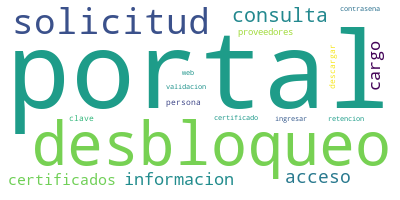

In [66]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [67]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [68]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['portal', 'solicitud', 'desbloqueo', 'proveedores', 'consulta',
       'acceso', 'informacion', 'pagos', 'certificados', 'cargo', 'solicito',
       'clave', 'contrasena', 'retencion', 'ingresar'],
      dtype='object')

In [69]:
df_in.tolist()

['realiza validacion informacion solicitud descargar certificados retencion registro portal persona consulta cargo aux contable',
 'fallas sonido inicio llamada contadora proveedor solicitud informacion servicios pendientes facturar',
 'realiza validacion informacion solicitud desbloqueo portal proveedores persona consulta cargo coordinador',
 'puedan colaborar solicitud mediantes lineas telefonicas solucionan nada estos docuemtos solicituddos solicitudn urgencia',
 'solicitud desbloqueo acceso portal consulta pagos',
 'solicitud desbloqueo acceso portal consulta pagos',
 'solicitud desbloqueo clave',
 'solicitud desbloqueo clave portal proveedores',
 'senores ayudarnos desbloquear ingreso plataforma proveedores',
 'solicitud clave contrasena acceder portal proveedores descargar certificado ingresos retenciones',
 'desbloqueo portal descargar certificados',
 'reenvio datos corregidos acuerdo pagina activacion obtencion certificados retenciones districandelaria',
 'portal bloqueo',
 're

In [70]:
dw = list(sent_to_words(df_in))

In [71]:
dw

[['realiza',
  'validacion',
  'informacion',
  'solicitud',
  'descargar',
  'certificados',
  'retencion',
  'registro',
  'portal',
  'persona',
  'consulta',
  'cargo',
  'aux',
  'contable'],
 ['fallas',
  'sonido',
  'inicio',
  'llamada',
  'contadora',
  'proveedor',
  'solicitud',
  'informacion',
  'servicios',
  'pendientes',
  'facturar'],
 ['realiza',
  'validacion',
  'informacion',
  'solicitud',
  'desbloqueo',
  'portal',
  'proveedores',
  'persona',
  'consulta',
  'cargo',
  'coordinador'],
 ['puedan',
  'colaborar',
  'solicitud',
  'mediantes',
  'lineas',
  'telefonicas',
  'solucionan',
  'nada',
  'estos',
  'docuemtos',
  'solicituddos',
  'solicitudn',
  'urgencia'],
 ['solicitud', 'desbloqueo', 'acceso', 'portal', 'consulta', 'pagos'],
 ['solicitud', 'desbloqueo', 'acceso', 'portal', 'consulta', 'pagos'],
 ['solicitud', 'desbloqueo', 'clave'],
 ['solicitud', 'desbloqueo', 'clave', 'portal', 'proveedores'],
 ['senores',
  'ayudarnos',
  'desbloquear',
  'ingr

In [72]:
len(dw)

1361

In [73]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



CPU times: user 19.8 s, sys: 864 ms, total: 20.6 s
Wall time: 21.2 s


In [74]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [75]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.146*"portal" + 0.108*"solicitud" + 0.094*"desbloqueo" + '
  '0.075*"proveedores" + 0.048*"acceso" + 0.044*"consulta" + '
  '0.032*"informacion" + 0.028*"cargo" + 0.027*"pagos" + 0.019*"persona"'),
 (1,
  '0.032*"solicito" + 0.029*"clave" + 0.023*"ingresar" + 0.023*"factura" + '
  '0.021*"contrasena" + 0.017*"empresa" + 0.016*"pagina" + 0.015*"bloqueado" + '
  '0.015*"pagos" + 0.014*"presente"'),
 (2,
  '0.031*"certificados" + 0.022*"retencion" + 0.021*"proveedor" + '
  '0.018*"descargar" + 0.016*"certificado" + 0.013*"poder" + '
  '0.013*"retenciones" + 0.013*"ingreso" + 0.012*"registro" + 0.012*"nos"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.275738 -0.002375       1        1  35.644365
1     -0.141195 -0.146454       2        1  33.015782
2     -0.134543  0.148829       3        1  31.339853, topic_info=             Term        Freq       Total Category  logprob  loglift
8          portal  605.000000  605.000000  Default  30.0000  30.0000
12      solicitud  445.000000  445.000000  Default  29.0000  29.0000
22     desbloqueo  387.000000  387.000000  Default  28.0000  28.0000
23    proveedores  309.000000  309.000000  Default  27.0000  27.0000
36         acceso  201.000000  201.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
235  solicitudmos   33.071173   51.131366   Topic3  -4.6974   0.7245
252       permito   17.476929   23.365331   Topic3  -5.3352   0.8699
200     respuesta   16.873424   30.597259   Topic3  -5.3703   0.5651
54         pagina   19.020181   80.609343   Topic3  -5.2506  -0.2838
46     contrasena   19.024438   98.745615   Topic3  -5.2503  -0.4865

[150 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
44        1  0.054186     acceder
44        2  0.921156     acceder
44        3  0.054186     acceder
36        1  0.993040      acceso
36        2  0.004965      acceso
...     ...       ...         ...
13        1  0.979323  validacion
13        3  0.017806  validacion
60        1  0.829828         web
60        2  0.010919         web
60        3  0.163782         web

[321 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

CPU times: user 3.23 s, sys: 143 ms, total: 3.37 s
Wall time: 5.08 s


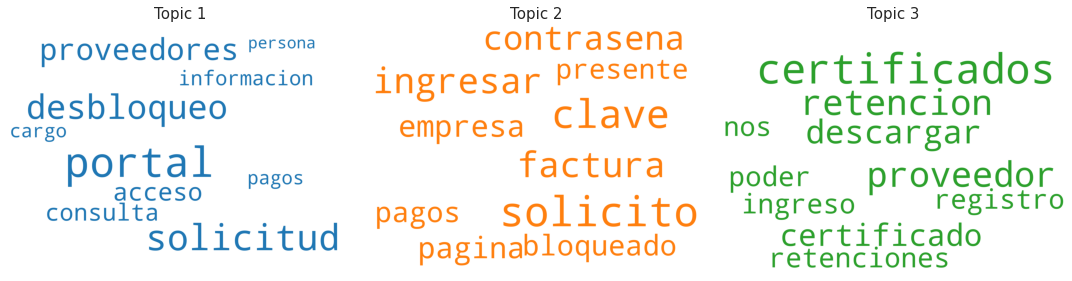

In [76]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [77]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



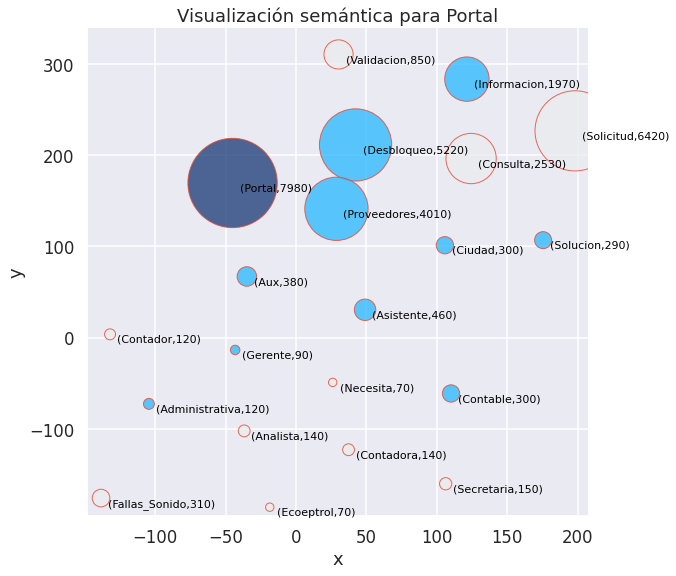

In [78]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

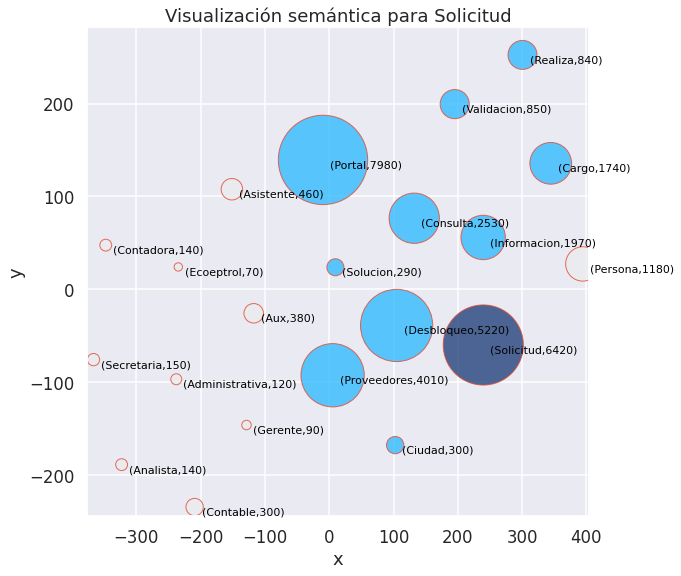

In [79]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

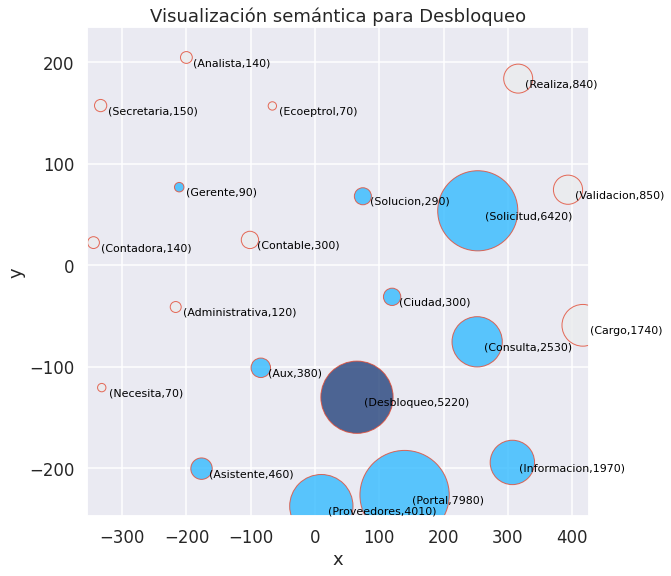

In [80]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

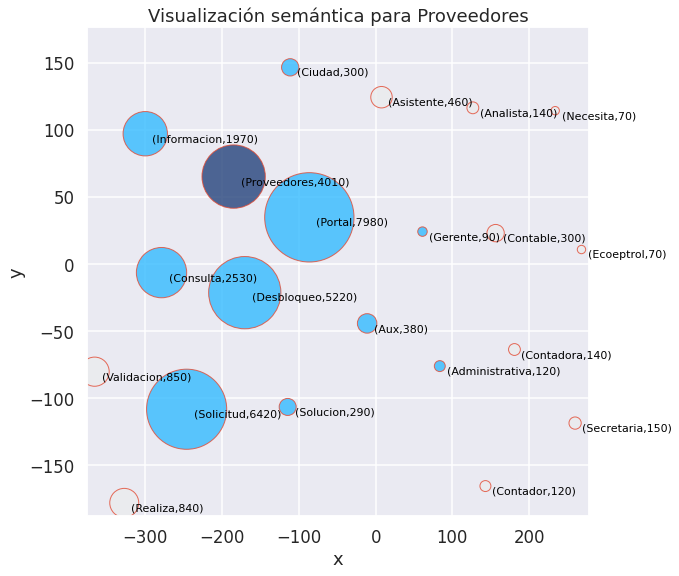

In [81]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]

tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

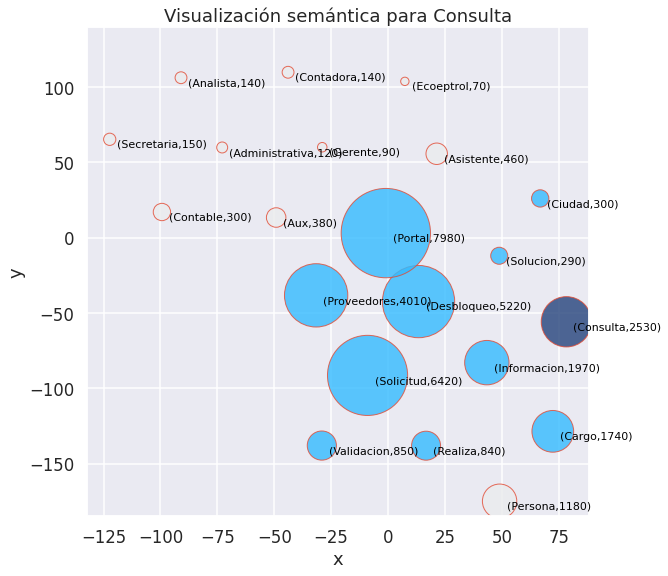

In [82]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
# nombre = 'cargo' #interes
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [83]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [84]:
#hacer version  con guines y sin guines que llos dijeron.

### Solucion

In [85]:
name = 'Solucion'

In [86]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_solucion
df_in.iloc[0]

'realiza validacion informacion solicitud procede terminar registro portal proveedores'

In [87]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['portal', 'respuesta', 'desbloqueo', 'informacion', 'solicitud', 'informamos', 'electronico', 'proveedores', 'datos', 'filtro', 'seguridad', 'clave', 'sistema', 'consulta', 'persona']


['portal proveedores', 'filtro seguridad', 'desbloqueo portal', 'envionos informacion', 'poder dar', 'dar respuesta', 'respuesta solicitud', 'solicitud informamos', 'persona consulta', 'informamos hemos', 'procede desbloqueo', 'clave diferente', 'registrados nuestro', 'respuesta requerimiento', 'asignando clave']


['poder dar respuesta', 'desbloqueo portal proveedores', 'dar respuesta requerimiento', 'coinciden registrados nuestro', 'asignando clave diferente', 'requerimiento envionos informacion', 'respuesta requerimiento envionos', 'ingresar registrarse nuevamente', 'nuevamente asignando clave', 'registrarse nuevamente asignando', 'desbloqueado ingresar registrarse', 'hemos desbloqueado ingresar', 'genera respuesta proveedor', 'informamos hemos desbloqueado', 'respuesta solicitud informamos']


['poder dar respuesta requerimiento', 'dar respuesta requerimiento envionos', 'respuesta requerimiento envionos informacion', 'ingresar registrarse nuevamente asignando', 'nuevamente asignando clave diferente', 'registrarse nuevamente asignando clave', 'desbloqueado ingresar registrarse nuevamente', 'hemos desbloqueado ingresar registrarse', 'informamos hemos desbloqueado ingresar', 'direccion ciudad telefono electronico', 'representante direccion ciudad telefono', 'informamos poder dar respuesta', 'realiza validacion informacion solicitud', 'coinciden registrados nuestro sistema', 'datos persona consulta completo']


['dar respuesta requerimiento envionos informacion', 'poder dar respuesta requerimiento envionos', 'ingresar registrarse nuevamente asignando clave', 'registrarse nuevamente asignando clave diferente', 'desbloqueado ingresar registrarse nuevamente asignando', 'hemos desbloqueado ingresar registrarse nuevamente', 'informamos hemos desbloqueado ingresar registrarse', 'representante direccion ciudad telefono electronico', 'informamos poder dar respuesta requerimiento', 'datos persona consulta completo cargo', 'mensaje coinciden registrados nuestro sistema', 'respuesta requerimiento envionos informacion empresa', 'sistema necesario verificar informacion actualizarla', 'electronico datos persona consulta completo', 'nuestro sistema necesario verificar informacion']


In [88]:
df_in.reset_index(inplace=True, drop=True)

In [89]:
df_in=df_in.apply(lambda x: x.strip())

In [90]:
df_in.head(3)

0    realiza validacion informacion solicitud proce...
1          direcciona solicitud administrador contrato
2    realiza validacion informacion solicitud proce...
Name: ObservacionSolucion_+_n2, dtype: object

In [91]:
df_in[2]

'realiza validacion informacion solicitud procede desbloqueo portal proveedores'

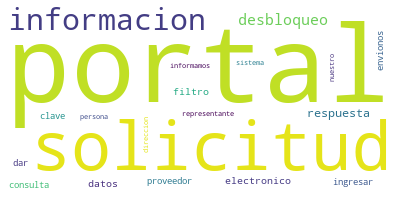

In [92]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [93]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [94]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['portal', 'respuesta', 'desbloqueo', 'informacion', 'solicitud',
       'informamos', 'electronico', 'proveedores', 'datos', 'filtro',
       'seguridad', 'clave', 'sistema', 'consulta', 'persona'],
      dtype='object')

In [95]:
df_in.tolist()

['realiza validacion informacion solicitud procede terminar registro portal proveedores',
 'direcciona solicitud administrador contrato',
 'realiza validacion informacion solicitud procede desbloqueo portal proveedores',
 'genera respuesta proveedor validando datos errados filtro seguridad',
 'informa analista contabilidad queda desbloqueado',
 'informa wwilmer bastias electronico coincide registrado proveedor indica comunicara nuevo',
 'restablece contrasena portal proveedores',
 'desbloquea portal proveedores',
 'informamos hemos desbloqueado ingresar registrarse nuevamente asignando clave diferente',
 'informamos dato telefono suministrado mensaje coinciden registrados nuestro sistema necesario verificar informacion actualizarla',
 'persona consulta marques cargo aux contable pasa filtro seguridad valida data actualizo representante ende procede desbloqueo portal escala data revision solucion mencion',
 'respuesta solicitud informamos hemos desbloqueado ingresar registrarse nuevamen

In [96]:
dw = list(sent_to_words(df_in))

In [97]:
dw

[['realiza',
  'validacion',
  'informacion',
  'solicitud',
  'procede',
  'terminar',
  'registro',
  'portal',
  'proveedores'],
 ['direcciona', 'solicitud', 'administrador', 'contrato'],
 ['realiza',
  'validacion',
  'informacion',
  'solicitud',
  'procede',
  'desbloqueo',
  'portal',
  'proveedores'],
 ['genera',
  'respuesta',
  'proveedor',
  'validando',
  'datos',
  'errados',
  'filtro',
  'seguridad'],
 ['informa', 'analista', 'contabilidad', 'queda', 'desbloqueado'],
 ['informa',
  'wwilmer',
  'bastias',
  'electronico',
  'coincide',
  'registrado',
  'proveedor',
  'indica',
  'comunicara',
  'nuevo'],
 ['restablece', 'contrasena', 'portal', 'proveedores'],
 ['desbloquea', 'portal', 'proveedores'],
 ['informamos',
  'hemos',
  'desbloqueado',
  'ingresar',
  'registrarse',
  'nuevamente',
  'asignando',
  'clave',
  'diferente'],
 ['informamos',
  'dato',
  'telefono',
  'suministrado',
  'mensaje',
  'coinciden',
  'registrados',
  'nuestro',
  'sistema',
  'necesari

In [98]:
len(dw)

1361

In [99]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



CPU times: user 18.2 s, sys: 870 ms, total: 19.1 s
Wall time: 19.2 s


In [100]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [101]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.085*"portal" + 0.080*"desbloqueo" + 0.051*"proveedores" + '
  '0.028*"solicitud" + 0.026*"informacion" + 0.024*"informa" + 0.023*"realiza" '
  '+ 0.021*"web" + 0.021*"procede" + 0.020*"contrasena"'),
 (1,
  '0.059*"filtro" + 0.054*"proveedor" + 0.054*"seguridad" + 0.042*"respuesta" '
  '+ 0.040*"genera" + 0.025*"solicitudndo" + 0.025*"registro" + 0.021*"envia" '
  '+ 0.020*"electronico" + 0.019*"ingreso"'),
 (2,
  '0.055*"informamos" + 0.045*"respuesta" + 0.036*"informacion" + '
  '0.033*"datos" + 0.031*"electronico" + 0.029*"solicitud" + 0.028*"clave" + '
  '0.025*"poder" + 0.025*"sistema" + 0.025*"dar"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.260485  0.093462       1        1  42.243759
0      0.044382 -0.259390       2        1  34.707768
1      0.216103  0.165929       3        1  23.048473, topic_info=            Term        Freq       Total Category  logprob  loglift
12    desbloqueo  374.000000  374.000000  Default  30.0000  30.0000
1         portal  427.000000  427.000000  Default  29.0000  29.0000
15        filtro  185.000000  185.000000  Default  28.0000  28.0000
41    informamos  314.000000  314.000000  Default  27.0000  27.0000
17     proveedor  167.000000  167.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
282          sea   28.074917   36.698578   Topic3  -4.7050   1.1997
18     respuesta  131.128394  388.434602   Topic3  -3.1637   0.3816
29   electronico   60.819966  240.296556   Topic3  -3.9319   0.0936
13         datos   29.284796  216.839655   Topic3  -4.6628  -0.5345
1         portal   28.644259  427.755757   Topic3  -4.6849  -1.2360

[150 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
149       1  0.014768      acreedor
149       2  0.974671      acreedor
149       3  0.014768      acreedor
45        1  0.968014  actualizarla
45        2  0.022000  actualizarla
...     ...       ...           ...
284       2  0.034547     verifique
284       3  0.967319     verifique
159       1  0.009830           web
159       2  0.982975           web
159       3  0.009830           web

[317 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

CPU times: user 3.04 s, sys: 51.4 ms, total: 3.09 s
Wall time: 3.32 s


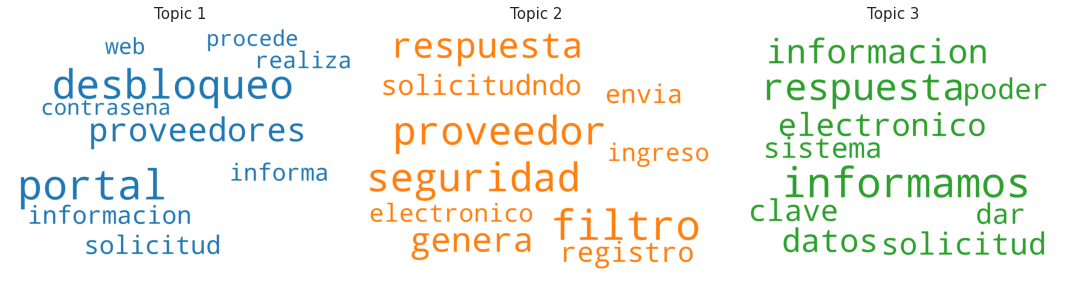

In [102]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [103]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



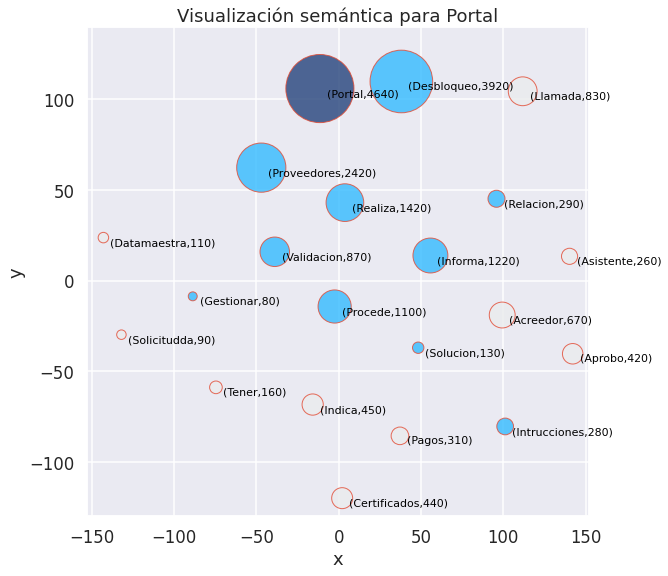

In [104]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

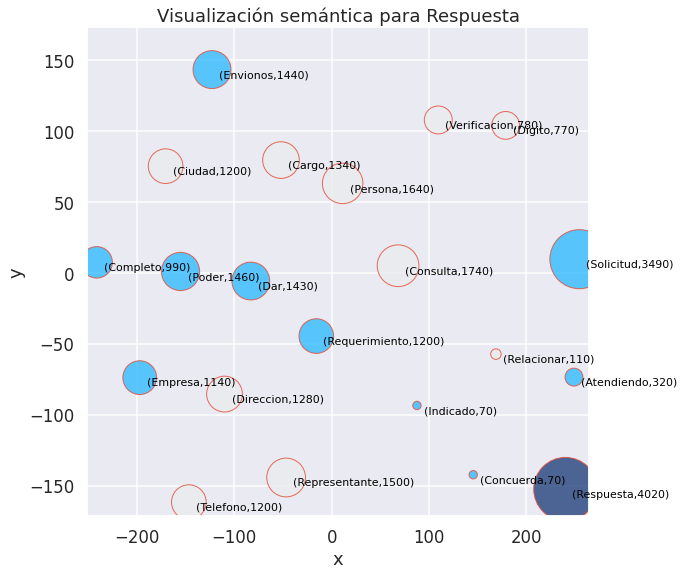

In [105]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

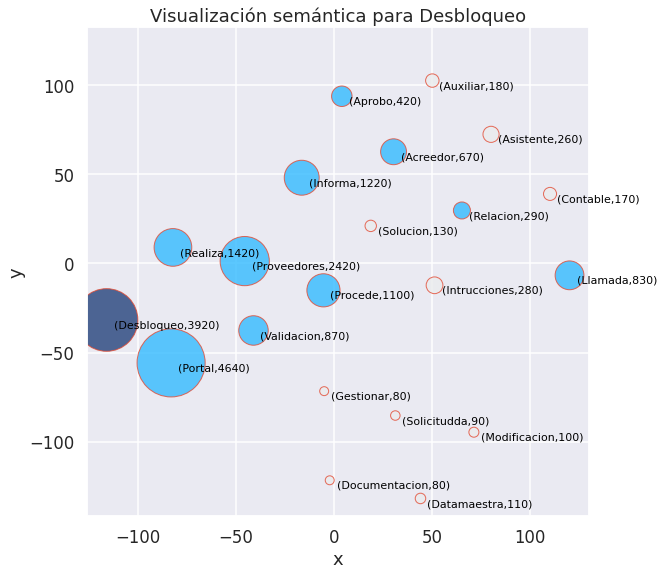

In [106]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

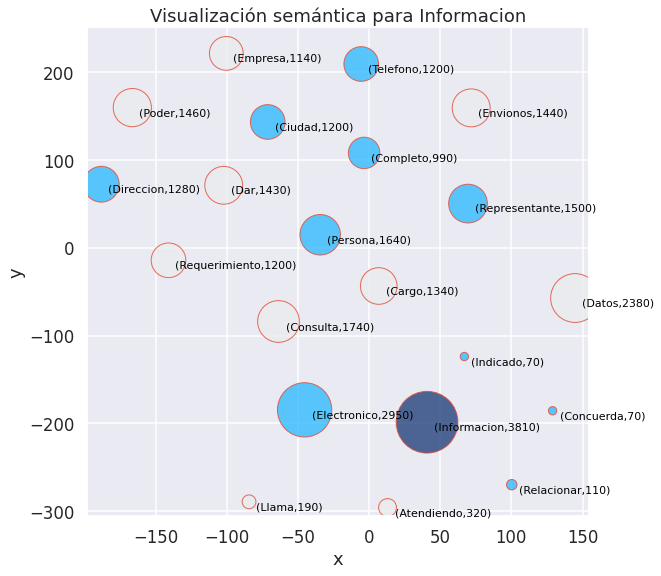

In [107]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

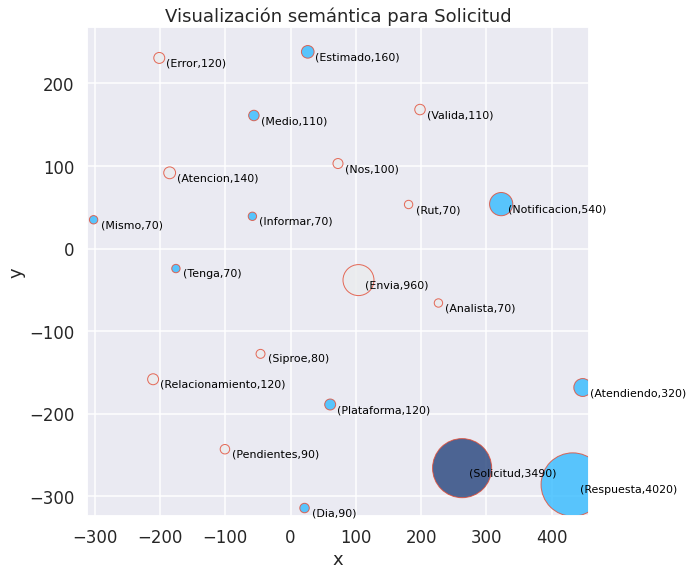

In [108]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [109]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [110]:
#hacer version  con guines y sin guines que llos dijeron.

### Total

In [111]:
name = 'Total'

In [112]:
df_creacion =grupo['ObservacionCreacion'].copy()
df_solucion =grupo['ObservacionSolucion_+_n2'].copy()
df_in=df_creacion+ ' '+ df_solucion
df_in.iloc[0]

'realiza validacion informacion solicitud descargar certificados retencion registro portal persona consulta cargo aux contable realiza validacion informacion solicitud procede terminar registro portal proveedores'

In [113]:
  for i in range(1,6):
    ng = i
    segmento = str.upper("({}_{}-gramas)".format(name,ng))
    # Iniciar el count vectorizer con stop words personalizado en español
    count_vectorizer = CountVectorizer(stop_words=[],ngram_range=(ng, ng))
    # Ajustar y transformar los términos procesados
    count_data = count_vectorizer.fit_transform(df_in)
    #Visualizar los términos mas comunes
    words,counts = plot_10_most_common_words(count_data, count_vectorizer)
    # buen dia , ecompetro com , com .co 
    print(words)

['portal', 'solicitud', 'desbloqueo', 'proveedores', 'informacion', 'respuesta', 'consulta', 'informamos', 'clave', 'electronico', 'cargo', 'datos', 'persona', 'ingresar', 'proveedor']


['portal proveedores', 'desbloqueo portal', 'solicitud desbloqueo', 'persona consulta', 'informacion solicitud', 'filtro seguridad', 'acceso portal', 'realiza validacion', 'validacion informacion', 'envionos informacion', 'poder dar', 'respuesta solicitud', 'dar respuesta', 'web portal', 'solicitud informamos']


['desbloqueo portal proveedores', 'solicitud desbloqueo portal', 'realiza validacion informacion', 'validacion informacion solicitud', 'poder dar respuesta', 'desbloqueo web portal', 'dar respuesta requerimiento', 'asignando clave diferente', 'coinciden registrados nuestro', 'requerimiento envionos informacion', 'respuesta requerimiento envionos', 'ingresar registrarse nuevamente', 'nuevamente asignando clave', 'registrarse nuevamente asignando', 'desbloqueado ingresar registrarse']


['solicitud desbloqueo portal proveedores', 'realiza validacion informacion solicitud', 'poder dar respuesta requerimiento', 'dar respuesta requerimiento envionos', 'respuesta requerimiento envionos informacion', 'ingresar registrarse nuevamente asignando', 'nuevamente asignando clave diferente', 'registrarse nuevamente asignando clave', 'desbloqueado ingresar registrarse nuevamente', 'hemos desbloqueado ingresar registrarse', 'informamos hemos desbloqueado ingresar', 'informacion solicitud desbloqueo portal', 'solicitud acceso portal proveedores', 'direccion ciudad telefono electronico', 'informamos poder dar respuesta']


['dar respuesta requerimiento envionos informacion', 'poder dar respuesta requerimiento envionos', 'ingresar registrarse nuevamente asignando clave', 'registrarse nuevamente asignando clave diferente', 'desbloqueado ingresar registrarse nuevamente asignando', 'hemos desbloqueado ingresar registrarse nuevamente', 'informamos hemos desbloqueado ingresar registrarse', 'representante direccion ciudad telefono electronico', 'informamos poder dar respuesta requerimiento', 'informacion solicitud desbloqueo portal proveedores', 'realiza validacion informacion solicitud desbloqueo', 'validacion informacion solicitud desbloqueo portal', 'datos persona consulta completo cargo', 'mensaje coinciden registrados nuestro sistema', 'respuesta requerimiento envionos informacion empresa']


In [114]:
df_in.reset_index(inplace=True, drop=True)

In [115]:
df_in=df_in.apply(lambda x: x.strip())

In [116]:
df_in.head(3)

0    realiza validacion informacion solicitud desca...
1    fallas sonido inicio llamada contadora proveed...
2    realiza validacion informacion solicitud desbl...
dtype: object

In [117]:
df_in[2]

'realiza validacion informacion solicitud desbloqueo portal proveedores persona consulta cargo coordinador realiza validacion informacion solicitud procede desbloqueo portal proveedores'

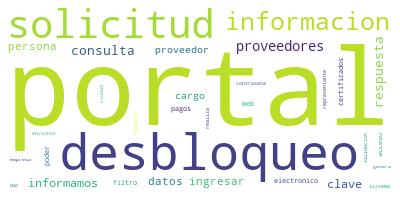

In [118]:
lista_mensajeuser=[]
for i in range(len(df_in)):
  lista_mensajeuser+=df_in[i]
long_string=''.join(lista_mensajeuser)
sal = pd.Series(long_string.split(' ')).value_counts()


sal2 = sal.reset_index()
sal2 = sal2.set_index('index')
saldic = sal2[0].to_dict()

#Creacion lista stop words
wordcloud = WordCloud(background_color="white",min_font_size=5, max_font_size=150, max_words=1000, contour_width=50, contour_color='steelblue', margin=15, 
                      stopwords=[])
#Crear el word cloud
#wordcloud.generate(long_string)
wordcloud.generate_from_frequencies(saldic)
# wordcloud.generate(saldic)
#Visualizar el word cloud
wordcloud.to_file('personal_patrones.png')
wordcloud.to_image()

In [119]:
segmento = str.upper("{}".format(name))
# Iniciar el count vectorizer con stop words personalizado en español
count_vectorizer = CountVectorizer(stop_words=[])
# Ajustar y transformar los términos procesados
count_data = count_vectorizer.fit_transform(df_in)
#Visualizar los términos mas comunes
x , y= plot_10_most_common_words(count_data, count_vectorizer)

In [120]:
pd.Series(df_in.map(lambda x : x.split(' ')).sum()).value_counts().head(15).index

Index(['portal', 'solicitud', 'desbloqueo', 'proveedores', 'informacion',
       'respuesta', 'consulta', 'informamos', 'clave', 'electronico', 'cargo',
       'datos', 'persona', 'ingresar', 'proveedor'],
      dtype='object')

In [121]:
df_in.tolist()

['realiza validacion informacion solicitud descargar certificados retencion registro portal persona consulta cargo aux contable realiza validacion informacion solicitud procede terminar registro portal proveedores',
 'fallas sonido inicio llamada contadora proveedor solicitud informacion servicios pendientes facturar direcciona solicitud administrador contrato',
 'realiza validacion informacion solicitud desbloqueo portal proveedores persona consulta cargo coordinador realiza validacion informacion solicitud procede desbloqueo portal proveedores',
 'puedan colaborar solicitud mediantes lineas telefonicas solucionan nada estos docuemtos solicituddos solicitudn urgencia genera respuesta proveedor validando datos errados filtro seguridad',
 'solicitud desbloqueo acceso portal consulta pagos informa analista contabilidad queda desbloqueado',
 'solicitud desbloqueo acceso portal consulta pagos informa wwilmer bastias electronico coincide registrado proveedor indica comunicara nuevo',
 'soli

In [122]:
dw = list(sent_to_words(df_in))

In [123]:
dw

[['realiza',
  'validacion',
  'informacion',
  'solicitud',
  'descargar',
  'certificados',
  'retencion',
  'registro',
  'portal',
  'persona',
  'consulta',
  'cargo',
  'aux',
  'contable',
  'realiza',
  'validacion',
  'informacion',
  'solicitud',
  'procede',
  'terminar',
  'registro',
  'portal',
  'proveedores'],
 ['fallas',
  'sonido',
  'inicio',
  'llamada',
  'contadora',
  'proveedor',
  'solicitud',
  'informacion',
  'servicios',
  'pendientes',
  'facturar',
  'direcciona',
  'solicitud',
  'administrador',
  'contrato'],
 ['realiza',
  'validacion',
  'informacion',
  'solicitud',
  'desbloqueo',
  'portal',
  'proveedores',
  'persona',
  'consulta',
  'cargo',
  'coordinador',
  'realiza',
  'validacion',
  'informacion',
  'solicitud',
  'procede',
  'desbloqueo',
  'portal',
  'proveedores'],
 ['puedan',
  'colaborar',
  'solicitud',
  'mediantes',
  'lineas',
  'telefonicas',
  'solucionan',
  'nada',
  'estos',
  'docuemtos',
  'solicituddos',
  'solicitudn'

In [124]:
len(dw)

1361

In [125]:
# @title Creación del Corpus
%%time

nlp = spacy.load('es_core_news_md')

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in swseg] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(dw, min_count=5, threshold=100))
trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram[dw], threshold=100))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in lista_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#Definicion de segmento a analizar

# data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
# texts = data_lemmatized

data_words_bigrams = make_bigrams(dw)
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# id2word = corpora.Dictionary(data_lemmatized)
id2word = corpora.Dictionary(data_words_bigrams)

# texts = data_lemmatized
texts = data_words_bigrams



corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



CPU times: user 19.8 s, sys: 593 ms, total: 20.4 s
Wall time: 21.3 s


In [126]:
# #@title Optimización del Modelo
# #Definicion del segmento persistente
# segmento = "Solucion"

# #Funcion de soporte
# def compute_coherence_values(corpus, dictionary, k, a, b):
    
#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10, 
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b,
#                                            per_word_topics=True)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
#     return coherence_model_lda.get_coherence()

# grid = {}
# grid['Validation_Set'] = {}

# #Rango de topicos
# min_topics = 2
# # max_topics = 11
# max_topics = 5
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# #Parametro Alpha
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# #Parametro Beta
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# #Conjuntos de validacion
# num_of_docs = len(corpus)
# corpus_sets = [corpus]

# corpus_title = ['100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# #Intensivo en tiempo (Promedio de tiempo: 2 Horas)

# if 1 == 1:
#     pbar = tqdm.tqdm(total=540)
    
#     for i in range(len(corpus_sets)):
#         for k in topics_range:
#             for a in alpha:
#                 for b in beta:
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
#                                                   k=k, a=a, b=b)

#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)
                    
#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv(segmento+'.csv', index=False)
#     pbar.close()

# #Persistencia de hiperparámetros
# model_results_tabc = pd.DataFrame(model_results)
# model_results_tabc.to_csv(segmento + '_model.csv')
# print("**", len(model_results_tabc), segmento, "\n")
# model_results_tabc.head()

# #Mejor Modelo
# model_results_tabc = pd.read_csv(segmento + '_model.csv')
# best_model = model_results_tabc[model_results_tabc.Coherence == model_results_tabc.Coherence.max()][:1]
# #display(best_model.head())

# #Hiperparámetros del mejor modelo
# Topics = int(best_model.Topics.item())
# Alpha = float(best_model.Alpha.item())
# Beta = float(best_model.Beta.item())

# print("HIPERPARÁMETROS DEL MODELO OPTIMIZADO:")
# print('\nNumero de Tópicos:', Topics)
# print('Parámetro Alfa:', Alpha)
# print('Parámetro Beta:', Beta)
# #esto estaba silenciado

In [127]:
#@title Modelo LDA Optimizado 
%%time
# se cambio la vesion de pylavis https://stackoverflow.com/questions/66123774/why-pyldavis-graph-does-not-display-topic-keywords-on-the-bar-chart
# import pyLDAvis.gensim
# %matplotlib inline
#Visualización del modelo
pyLDAvis.enable_notebook()
# pyLDAvis.enable_notebook(local=True)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.909999999999999,
                                           eta=0.61,                                        
                                           per_word_topics=True)

#Visualizacion de los tópicos generados en el modelo LDA
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#Prerrequisitos minimos para la representacion grafica del modelado de topicos
d = id2word
c = corpus
lda = lda_model

#Parametros de visualizacion
data = pyLDAvis.gensim.prepare(lda, c, d)

#Persistencia de resultados de modelado de tópicos
pyLDAvis.save_html(data, 'vis_' +name + '.html')
print('\n\n')
#Visualizacion
display(data)


[(0,
  '0.035*"datos" + 0.032*"respuesta" + 0.031*"informacion" + '
  '0.029*"electronico" + 0.028*"poder" + 0.025*"empresa" + 0.023*"informamos" '
  '+ 0.020*"representante" + 0.020*"direccion" + 0.020*"dar"'),
 (1,
  '0.122*"portal" + 0.088*"desbloqueo" + 0.065*"solicitud" + '
  '0.064*"proveedores" + 0.028*"informacion" + 0.027*"consulta" + '
  '0.026*"acceso" + 0.022*"cargo" + 0.019*"web" + 0.018*"realiza"'),
 (2,
  '0.031*"clave" + 0.027*"proveedor" + 0.026*"ingresar" + 0.019*"respuesta" + '
  '0.016*"informamos" + 0.014*"registrarse" + 0.014*"desbloqueado" + '
  '0.013*"contrasena" + 0.013*"nuevamente" + 0.013*"hemos"')]





PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.251925 -0.021029       1        1  35.603950
2      0.151164 -0.147150       2        1  34.191788
0      0.100761  0.168179       3        1  30.204262, topic_info=            Term         Freq        Total Category  logprob  loglift
8         portal  1082.000000  1082.000000  Default  30.0000  30.0000
29    desbloqueo   782.000000   782.000000  Default  29.0000  29.0000
10   proveedores   568.000000   568.000000  Default  28.0000  28.0000
31         datos   261.000000   261.000000  Default  27.0000  27.0000
64         clave   277.000000   277.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
7        persona    94.159252   251.201158   Topic3  -4.3757   0.2159
14     solicitud   140.019919   796.595900   Topic3  -3.9789  -0.5414
1          cargo    78.397660   271.387083   Topic3  -4.5589  -0.0446
169     solicito    61.492666   138.903811   Topic3  -4.8018   0.3823
54         pagos    61.332287   210.770153   Topic3  -4.8044  -0.0373

[175 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
49        1  0.949157         acceso
49        2  0.012274         acceso
49        3  0.040912         acceso
231       1  0.981082       acreedor
231       2  0.015573       acreedor
...     ...       ...            ...
522       2  0.958150  verifique_sea
522       3  0.034220  verifique_sea
129       1  0.849533            web
129       2  0.108782            web
129       3  0.041441            web

[380 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

CPU times: user 4.22 s, sys: 83.5 ms, total: 4.3 s
Wall time: 4.55 s


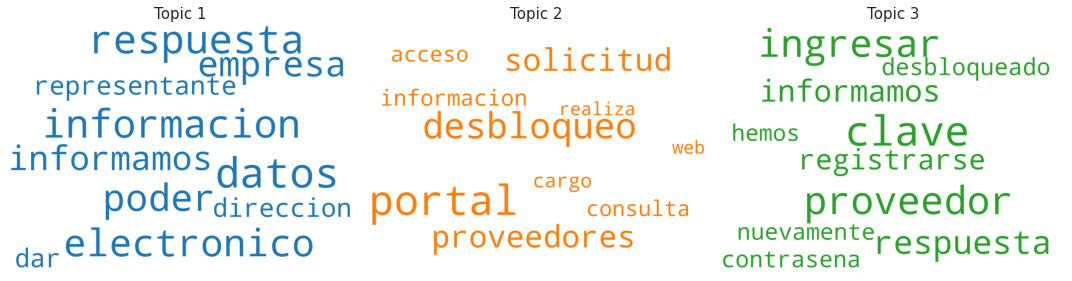

In [128]:
#@title Nubes de Palabras de los Términos clave N Principales en cada Tema
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.savefig("personal_{}_topics_{}_results.png".format(name,i+1),bbox_inches = 'tight')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [129]:
#@title Red Semántica

#CREACION DEL CORPUS Y FACTORIZACION DE TERMINOS
#Analizando los mensajes del usuario en general
data=df_in.tolist()

#Oraciones a lista de palabras, remocion de puntuacion y caracteres innecesarios
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remueve puctuacion

data_words = list(sent_to_words(data))# Se crea una lista de listas

#BRIGRAMAS
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Umbral superior de pocas frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])
# Funciones para bigrams, trigrams lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#Aplicacion de las respectivas funciones
#Formacion de bigramas
data_words_bigrams = make_bigrams(data_words)

#Creacion del diccionario
id2word = corpora.Dictionary(data_words_bigrams)

# Creacion del Corpus
texts = data_words_bigrams

#Frecuencia termino documento
corpus = [id2word.doc2bow(text) for text in texts]

#VEMOS CUANTOS TERMINOS ESTAN EN NUESTRO DICCIONARIO Y CUALES SON LOS MÁS FRECUENTE
word_freq = defaultdict(int)
for sent in data_words_bigrams:
    for i in sent:
        word_freq[i] += 10
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[50:100]

cores = multiprocessing.cpu_count()

##Entrenamiento del Modelo
w2v_model = Word2Vec(min_count=7, #SE CONSTRUYE EL VOCABULARIO A PARTIR DE LA FRECUENCIA DE APARICION QUE SE DEFINA AQUI
                     window=3,#SE AJUSTA EL NUMERO DE PALABRAS ATRAS Y ADELANTE DE LA PALABRA OBJETIVO PARA VECORIZARLA
                     size=30, #EL TAMANO DEL VECTOR DE CADA PALABRA
                     sample=1e-4, #-5 en principio #ESTE ES EL PARAMETRO QUE HAY QUE AJUSTAR, ES EL MAS SENSIBLE DEL MODELO
                     alpha=0.003, 
                     min_alpha=0.007, 
                     negative=10,
                     workers=cores-1)

#Construccion de vocabulario
w2v_model.build_vocab(data_words_bigrams, progress_per=10000)

#Entrenamiento del modelo
a=w2v_model.train(data_words_bigrams, total_examples=w2v_model.corpus_count, epochs=200, report_delay=1)

#Terminos similares
# w2v_model.wv.most_similar(positive=["contrasena"], topn=10)

##FUNCION PARA REDUCIR LA DIMENSION DEL ESPACIO DE PALABRAS Y PODER VISUALIZARLAS
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 30), dtype='f')
    word_labels = [word]
    color_list  = ["#25427B"] #a los colores de la campaña

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("#33BBFF")
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("#EBECED")
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    freq=[]
    for i in word_labels:
       freq.append(word_freq[i])

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list,'freq':freq})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': df['freq'],
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ('+ df["words"][line].title()+','+str(df['freq'][line])+')',
                 horizontalalignment='left',
                 verticalalignment='top', size='small',
                 #color=df['color'][line],
                 color='black',
                 weight='normal'
                ).set_size(11)
    
    plt.axis(emit=True)
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+30)
    plt.title('Visualización semántica para {}'.format(word.title()))

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



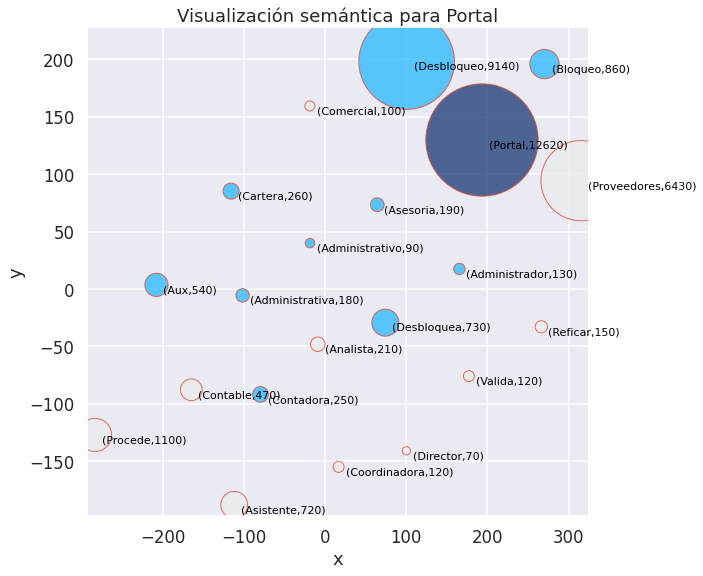

In [130]:
#@title
nombre = x[0]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')##

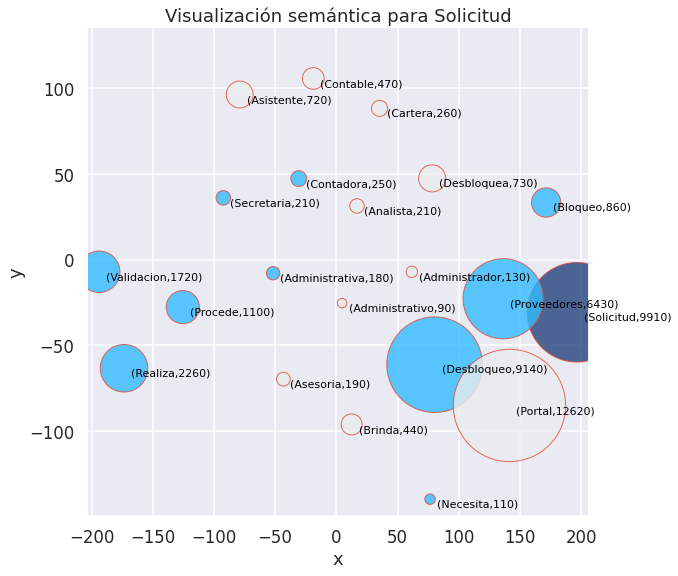

In [131]:
#@title


# tsnescatterplot(w2v_model, "activo", [t[0] for t in w2v_model.wv.most_similar(positive=["activo"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
#@title
nombre = x[1]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

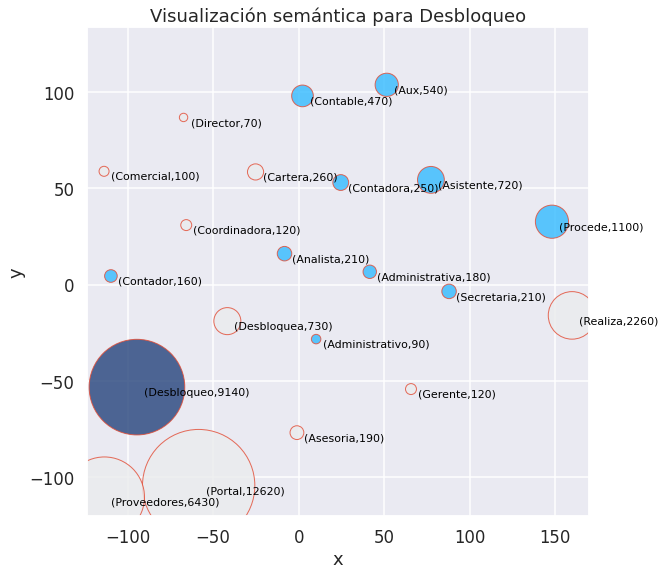

In [132]:
# @title 
#cuota se replaza por el temino clave que encontramos en las graficas de barras para 1-gramas
# tsnescatterplot(w2v_model, "confirmar", [t[0] for t in w2v_model.wv.most_similar(positive=["confirmar"], topn=20)][10:])
# plt.savefig("cuota_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[2]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

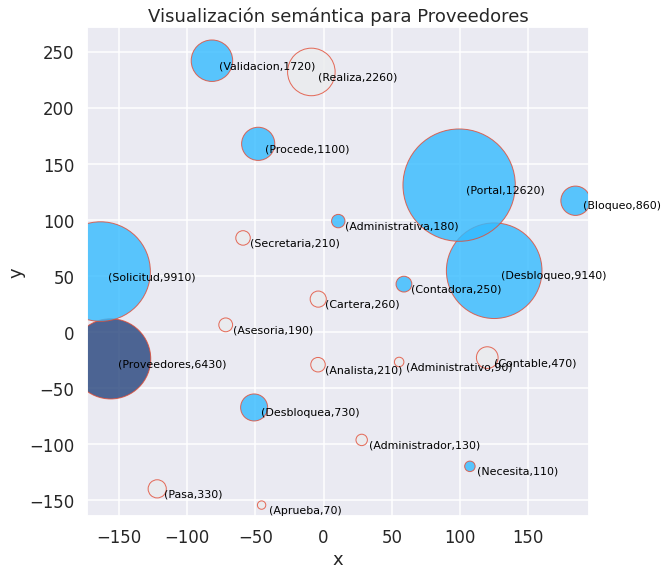

In [133]:
#@title
# tsnescatterplot(w2v_model, "actualizar", [t[0] for t in w2v_model.wv.most_similar(positive=["actualizar"], topn=20)][10:])
# plt.savefig("intereses_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')
nombre = x[3]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

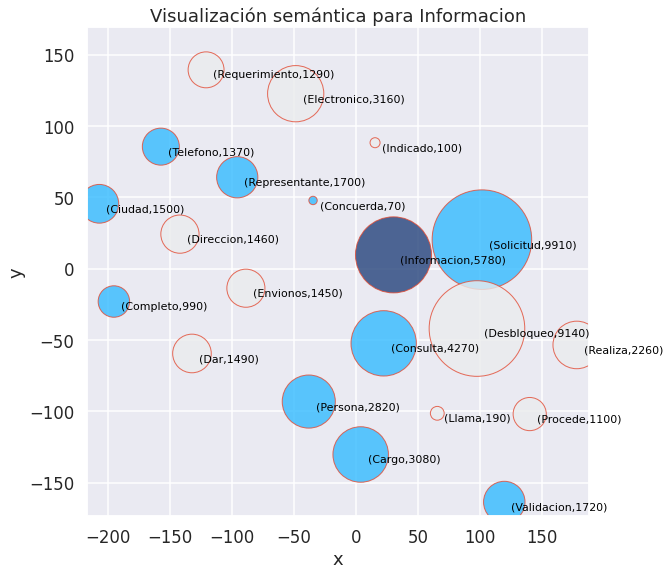

In [134]:
#@title
# tsnescatterplot(w2v_model, "codigo", [t[0] for t in w2v_model.wv.most_similar(positive=["codigo"], topn=20)][10:])
# plt.savefig("llegando_similaridad_calidad_personal_certificado.png",bbox_inches = 'tight')

nombre = x[4]
tsnescatterplot(w2v_model, nombre, [t[0] for t in w2v_model.wv.most_similar(positive=[nombre], topn=20)][10:])
plt.savefig(nombre+".png",bbox_inches = 'tight')
##

In [135]:
 word_vectors = w2v_model.wv
 word_vectors.save_word2vec_format('w2vecx_total_{}'.format(name))
 #Save model
from gensim.scripts.word2vec2tensor import word2vec2tensor 
word2vec2tensor('w2vecx_total_{}'.format(name), '{}_total_tensor00'.format(name))

In [136]:
#hacer version  con guines y sin guines que llos dijeron.